# Проект: Обучение с учителем: качество модели
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Задачи исследования:
+ Изучить данные
+ Привести их в пригодный для анализа формат
+ Провести корреляционный анализ
+ Выявить закономерности для подготовки полученных данных к загрузке в модели машинного обучения
+ Обучение моделей регрессии и классификации для решения поставленной бизнес задачи
+ Сделать вывод на основе полученных результатов

Цель исследования:  разработать модель машинного обучения, которая поможет выявить факторы, которые наиболее влияют на повышение покупательской активности.

Ход исследования:
+ Загрузка данных
+ Предобработка данных
+ Исследовательский анализ данных
+ Объединение таблиц
+ Корреляционный анализ
+ Использование пайплайнов
+ Анализ важности признаков
+ Сегментация покупателей
+ Вывод

In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.multiclass import type_of_target

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score, 
    f1_score, 
    roc_curve, 
    roc_auc_score
)

from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV
) 

from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler,
    OneHotEncoder,
    LabelEncoder, 
    OrdinalEncoder    
)

from sklearn.feature_selection import (
    SelectKBest, 
    f_classif, 
    mutual_info_classif
) 
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import statsmodels.api as sm
from scipy import stats, optimize, interpolate
from scipy.stats import shapiro
import scipy.stats.mvn
import shap
import phik
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Выгузили необходимые библиотеки, приступим к загрузки данных

## Загрузка данных

In [2]:
try:
    df_market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal=',')
    df_market_money = pd.read_csv('/datasets/market_money.csv',sep=',', decimal=',')
    df_market_time = pd.read_csv('/datasets/market_time.csv',sep=',', decimal=',')
    df_money = pd.read_csv('/datasets/money.csv',sep=',', decimal=',')
except:
    df_market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv',sep=',', decimal=',')
    df_market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv',sep=',', decimal=',')
    df_market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv',sep=',', decimal=',')
    df_money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv',sep=';', decimal=',')

In [3]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

In [4]:
df_market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


In [6]:
df_market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [8]:
df_market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [10]:
df_money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Успешно выгрузили 4 датасета:
+ df_market_file - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Она состоит из 1300 записей и 13 столбцов.
+ df_market_money - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Она состоит из 3900 записей и 3 столбцов.
+ df_market_time - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Она состоит из 2600 записей и 3 столбцов.
+ df_money - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Она состоит из 1300 записей и 2 столбцов.

На первый взгляд уже нашлись помарки в названиях столбцов, которые нужно обработать.

## Предобработка данных

In [11]:
datasets = [df_market_file, df_market_time, df_market_money, df_money]
for i in datasets:
    print('--------------')
    print(i.isna().sum())
    print(f'Кол-во явных дубликатов', i.duplicated().sum())
    print(i.nunique())
    print('--------------')

--------------
id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64
Кол-во явных дубликатов 0
id                                     1300
Покупательская активность                 2
Тип сервиса                               3
Разрешить сообщать                        2
Маркет_актив_6_мес                       41
Маркет_актив_тек_мес                      3
Длительность                            658
Акционные_покупки                        42
Популярная_категория                      6
Средний_просмотр_

В представленных датасетах нет явных дубликатов и пропусков, поэтому можем проверить датасеты на наличие неявных дубликатов.

In [12]:
columns = df_market_file.columns
for col in columns:
    print(col, df_market_file[col].unique())

id [215348 215349 215350 ... 216645 216646 216647]
Покупательская активность ['Снизилась' 'Прежний уровень']
Тип сервиса ['премиум' 'стандартт' 'стандарт']
Разрешить сообщать ['да' 'нет']
Маркет_актив_6_мес ['3.4' '4.4' '4.9' '3.2' '5.1' '3.3' '4.7' '4.2' '3.9' '4.6' '4.3' '3.8'
 '2.7' '4.8' '2.9' '3.0' '2.4' '1.7' '3.6' '4.0' '1.5' '3.5' '4.1' '3.1'
 '1.4' '0.9' '5.6' '2.6' '5.5' '5.2' '5.8' '5.0' '5.4' '5.7' '5.3' '3.7'
 '6.3' '6.6' '4.5' '6.1' '5.9']
Маркет_актив_тек_мес [5 4 3]
Длительность [ 121  819  539  896 1064  762  431  284  192  154  450  110  623  199
  438  923  708  167  209  581  829  607  572  365  566  811  268  558
  534  730  488  436  637  554  330  504 1020  721  495  135  663 1047
  152  754  525  169  966  645  706  689  882 1007  304  339  954  771
  699  669  511  974  666  857 1048  756  506  759  768  720  219  377
  472  806  449  523  503  515  813  249  186  336  690  824  753  674
  875  844  602  855  448  344  922  298  893  881  372  788  937  764
  8

Выявлен один неявный дубликат в столбце тип сервиса - обработаем его.

In [13]:
df_market_file.loc[df_market_file['Тип сервиса'] == 'стандартт', 'Тип сервиса'] = 'стандарт'
df_market_file.loc[df_market_file['Популярная_категория'] == 'Косметика и аксесуары', 'Популярная_категория'] = 'Косметика и аксессуары'

In [14]:
columns = df_market_file.columns
for col in columns:
    print(col, df_market_file[col].unique())

id [215348 215349 215350 ... 216645 216646 216647]
Покупательская активность ['Снизилась' 'Прежний уровень']
Тип сервиса ['премиум' 'стандарт']
Разрешить сообщать ['да' 'нет']
Маркет_актив_6_мес ['3.4' '4.4' '4.9' '3.2' '5.1' '3.3' '4.7' '4.2' '3.9' '4.6' '4.3' '3.8'
 '2.7' '4.8' '2.9' '3.0' '2.4' '1.7' '3.6' '4.0' '1.5' '3.5' '4.1' '3.1'
 '1.4' '0.9' '5.6' '2.6' '5.5' '5.2' '5.8' '5.0' '5.4' '5.7' '5.3' '3.7'
 '6.3' '6.6' '4.5' '6.1' '5.9']
Маркет_актив_тек_мес [5 4 3]
Длительность [ 121  819  539  896 1064  762  431  284  192  154  450  110  623  199
  438  923  708  167  209  581  829  607  572  365  566  811  268  558
  534  730  488  436  637  554  330  504 1020  721  495  135  663 1047
  152  754  525  169  966  645  706  689  882 1007  304  339  954  771
  699  669  511  974  666  857 1048  756  506  759  768  720  219  377
  472  806  449  523  503  515  813  249  186  336  690  824  753  674
  875  844  602  855  448  344  922  298  893  881  372  788  937  764
  851 1021  627

Ошибок больше нет, можем двигаться дальше.

In [15]:
columns = df_market_money.columns
for col in columns:
    print(col, df_market_money[col].unique())


id [215348 215349 215350 ... 216645 216646 216647]
Период ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Выручка ['0.0' '3293.1' '4472.0' ... '5224.6' '4720.0' '4448.3']


In [16]:
columns = df_market_time.columns
for col in columns:
    print(col, df_market_time[col].unique())


id [215348 215349 215350 ... 216645 216646 216647]
Период ['текущий_месяц' 'предыдцщий_месяц']
минут [14 13 10 12  8 11  6  7  9  5 15  4 16 17 19 18 22 20 21 23]


In [17]:
# Исправим помарку
df_market_time.loc[df_market_time['Период'] == 'предыдцщий_месяц', 'Период'] = 'предыдущий_месяц'

In [18]:
columns = df_market_time.columns
for col in columns:
    print(col, df_market_time[col].unique())


id [215348 215349 215350 ... 216645 216646 216647]
Период ['текущий_месяц' 'предыдущий_месяц']
минут [14 13 10 12  8 11  6  7  9  5 15  4 16 17 19 18 22 20 21 23]


Неявные дубликаты и помарки обработаны - приступим к изменению типов столбцов в данных.

In [19]:
df_market_money['Выручка'] = df_market_money['Выручка'].astype('float')

In [20]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [21]:
df_market_file['Маркет_актив_6_мес'] = df_market_file['Маркет_актив_6_мес'].astype('float')

In [22]:
df_market_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   object 
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [23]:
df_market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [24]:
df_market_file['Акционные_покупки'] = df_market_file['Акционные_покупки'].astype('float')

Мы успешно отработали неявные дубликаты, привели необходимые столбцы к верным типам данных. Пока столбцы не будем приводить к snake_case, проведем эту операцию с финальным датасетом. Проведем исследовательский анализ данных.

## Исследовательский анализ данных

In [25]:
df_market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


По итогам выгрузки статистик не выявлено бросющихся в глаза выбросов, проведем анализ по столбцам датасета.

In [26]:
df_market_file['Покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

<Axes: title={'center': 'Покупательская активность'}, ylabel='Покупательская активность'>

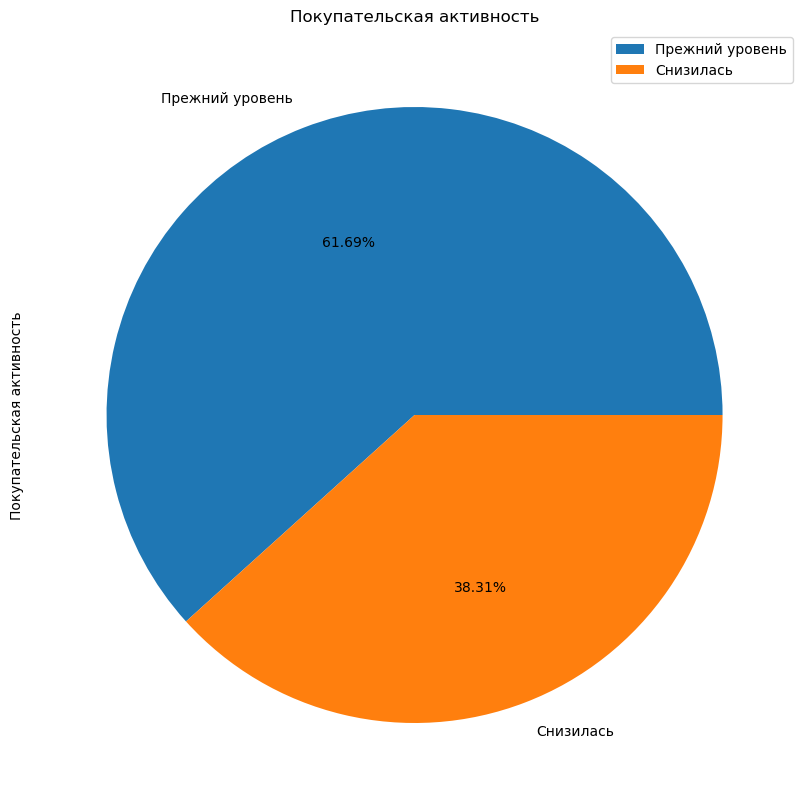

In [27]:
df_market_file['Покупательская активность'].value_counts().plot(kind='pie', 
                                                             figsize=(10, 10), 
                                                             title='Покупательская активность', 
                                                             autopct='%.2f%%', 
                                                             legend=True)

   Достаточно высока доля тех, у кого снизилась покупательская активность - более трети пользователей. Надо проверить данные на двух когортах пользователей, с подпиской и без.

<Axes: title={'center': 'Распределение покупательской активности в зависимости от вида подписки'}, xlabel='Покупательная активность', ylabel='Количество'>

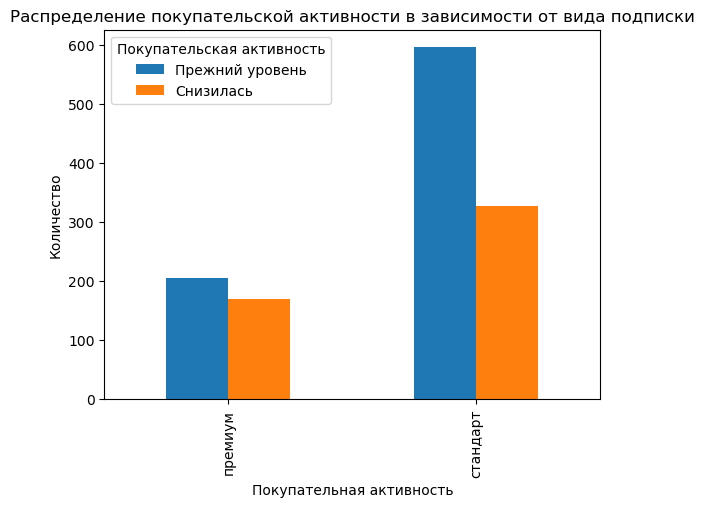

In [28]:
customer_loyalty = df_market_file.pivot_table(index='Тип сервиса', columns='Покупательская активность', 
                           values='id',aggfunc='count')
customer_loyalty.plot(kind='bar', title='Распределение покупательской активности в зависимости от вида подписки', 
                        xlabel='Покупательная активность', 
                        ylabel='Количество')

Как видим, среди пользователей с подпиской доля пользователей со снижением активности - больше, чем в другой когорте. Это наблюдение поможет при составлении дальнейших рекомендаций.

In [29]:
# Функция для категориальных переменных
def graphics_cow(df, column, title):
    sns.countplot(data = df, x=column, orient='h')
    plt.suptitle(title)
    plt.xticks(rotation=90)
    plt.figure(figsize = (25,10))
    plt.show()

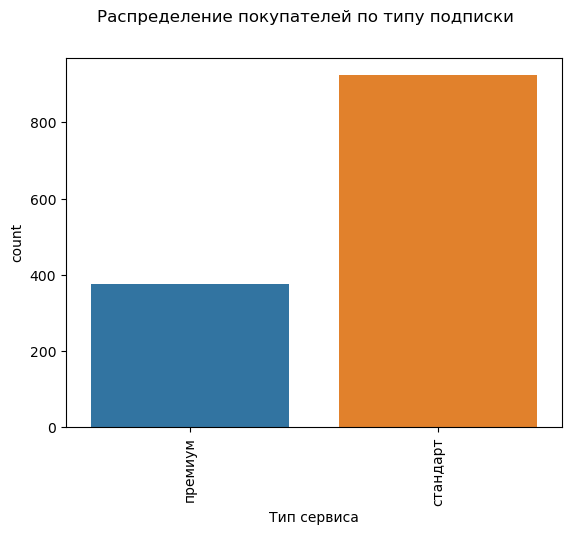

<Figure size 2500x1000 with 0 Axes>

In [30]:
graphics_cow(df_market_file, 'Тип сервиса', 'Распределение покупателей по типу подписки')

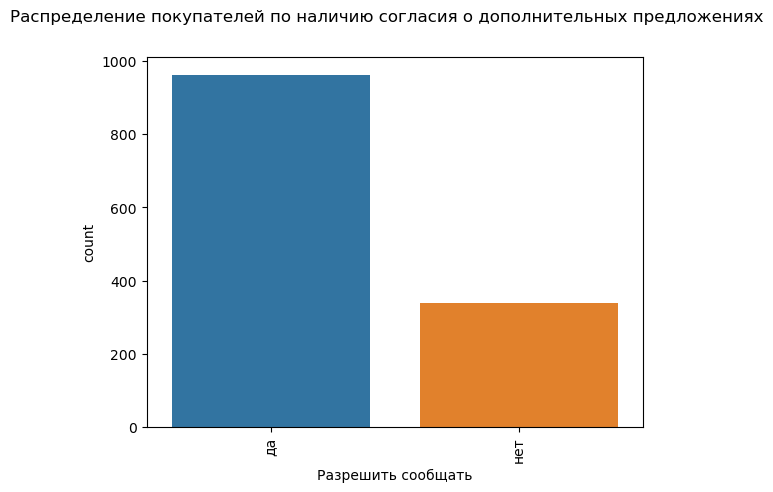

<Figure size 2500x1000 with 0 Axes>

In [31]:
graphics_cow(df_market_file, 'Разрешить сообщать', 
             'Распределение покупателей по наличию согласия о дополнительных предложениях')

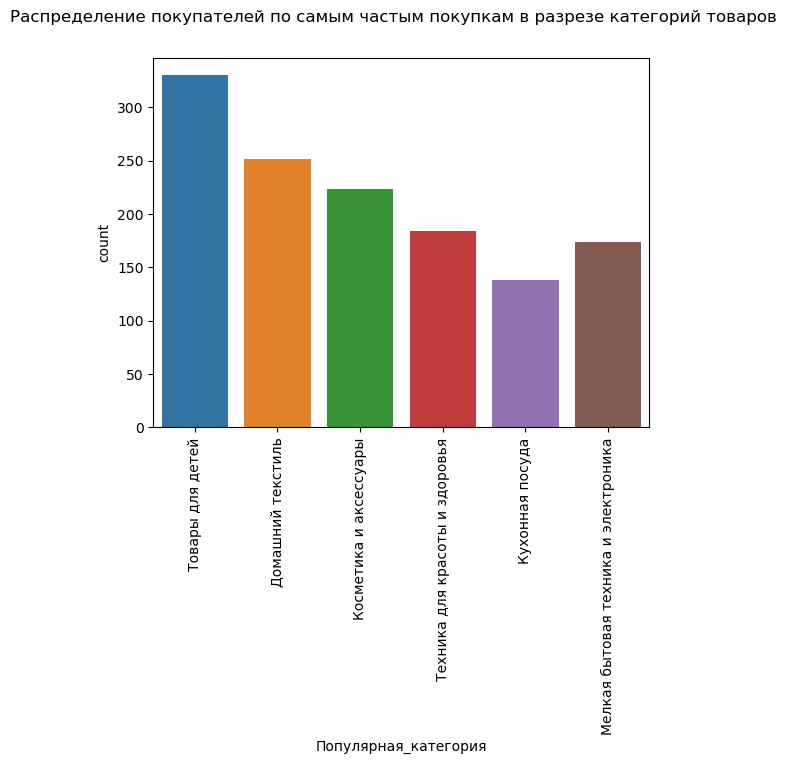

<Figure size 2500x1000 with 0 Axes>

In [32]:
graphics_cow(df_market_file, 'Популярная_категория', 
             'Распределение покупателей по самым частым покупкам в разрезе категорий товаров')

Исходя из анализа категориальных переменных - пользователей без подписки больше, чем с ней. Также пользователи не против получения акционных рассылок. Самые популярные категории - товары для детей, домашний текстиль и косметика и аксессуары.

In [33]:
def graphics(df, column, name):        # Построение графика для числовых признаков
    sns.set(rc={"figure.figsize": (12, 6)})
    fig, axes = plt.subplots(1, 2)
        
    sns.histplot(data=df[column], bins=20, ax=axes[0])
    axes[0].set(ylabel='Кол-во пользователей', xlabel=column)
        
    sns.boxplot(data=df[column], ax=axes[1])
    axes[1].set(ylabel=column)
        
    plt.suptitle(name)
    plt.show()
        
    
def graphics_discrete(df, column, name):
    sns.countplot(x=column, data=df)
    plt.xlabel(column)
    plt.ylabel('Кол-во пользователей')
    
    plt.suptitle(name)
    plt.show()

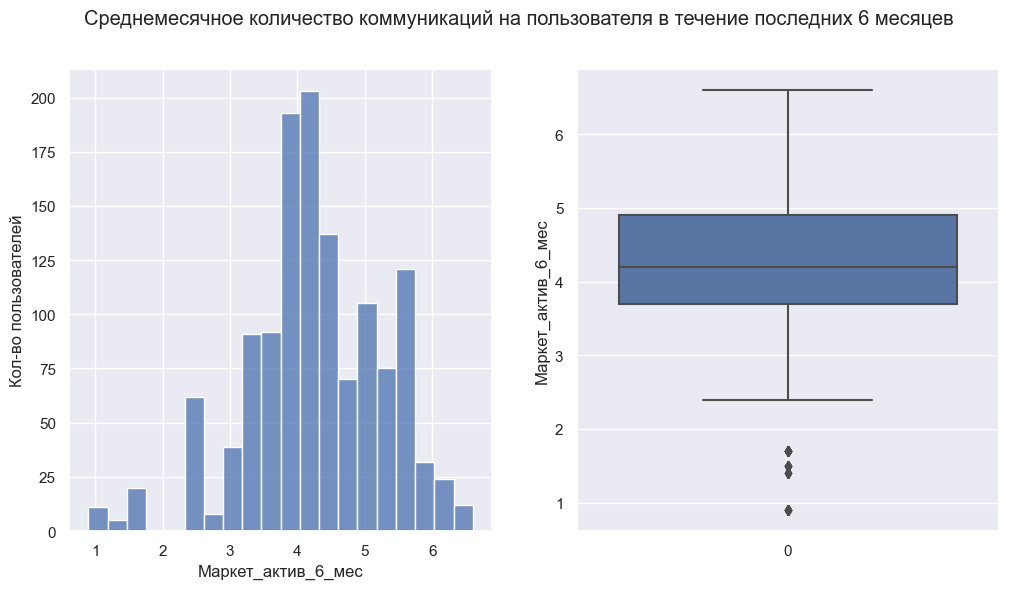

In [34]:
graphics(df_market_file, 'Маркет_актив_6_мес', 
         'Среднемесячное количество коммуникаций на пользователя в течение последних 6 месяцев')

Наблюдается несколько выбросов по связи с пользователями за последние 6 месяцев, возможно они недавно зарегистрировались на маркетплейсе.

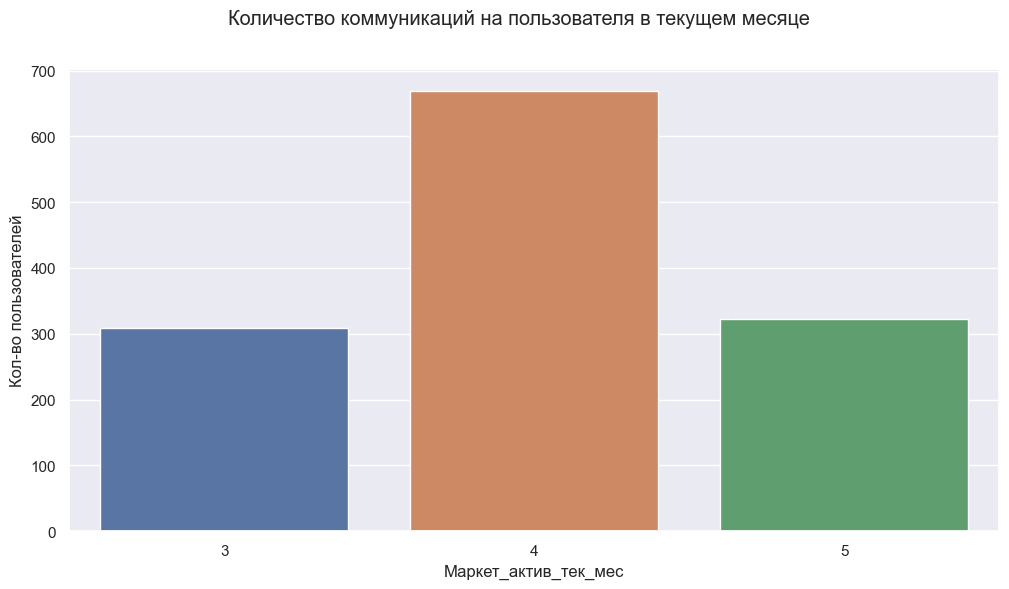

In [35]:
graphics_discrete(df_market_file, 'Маркет_актив_тек_мес', 
         'Количество коммуникаций на пользователя в текущем месяце')

In [36]:
 # проведу тест Шапиро-Уилка для проверки нормальности распределения
shapiro(df_market_file['Маркет_актив_тек_мес'].sample(300))

ShapiroResult(statistic=0.8081434965133667, pvalue=1.5214968901783738e-18)

Больше половины пользователям рассылка 4 раза, другим же либо 3, либо 5, возможно это зависит от настроек рассылки, кто-то включает ее на товары, которые они ждут к наличию, либо на акции, для достоверной интерпетации надо уточнить данные.

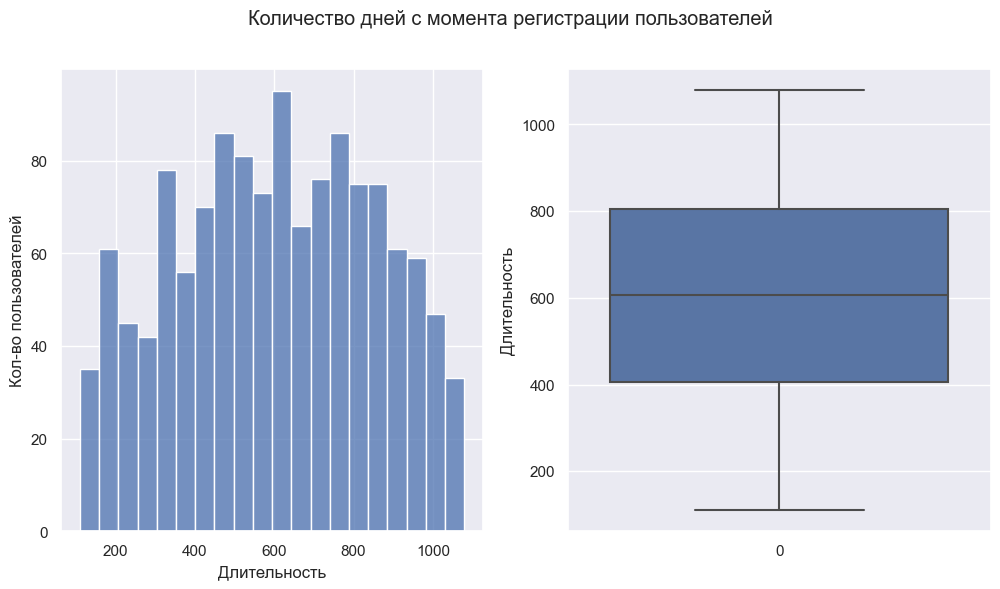

In [37]:
graphics(df_market_file, 'Длительность', 
         'Количество дней с момента регистрации пользователей')

Выбросы отсуствуют, но отчетливо видно, что есть большая дифференциация между сроком регистрации у самого раннего пользователя и самого позднего.

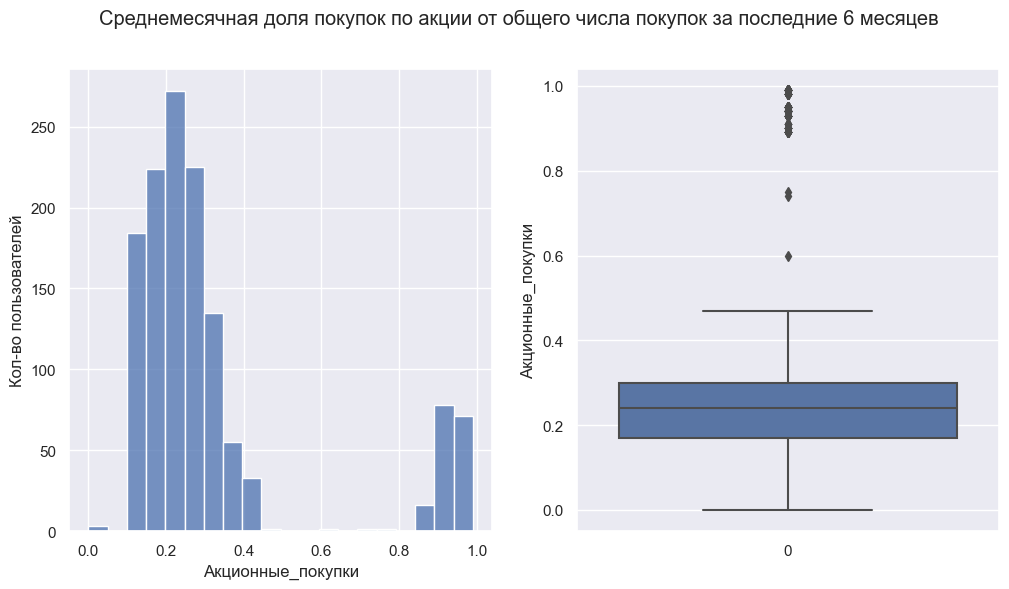

In [38]:
graphics(df_market_file, 'Акционные_покупки', 
         'Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев')

Весьма интересно, что на графике можно выявить две когорты пользователей по акционным покупкам, при этом доля тех, кто постоянно покупает только в акции - не велика.

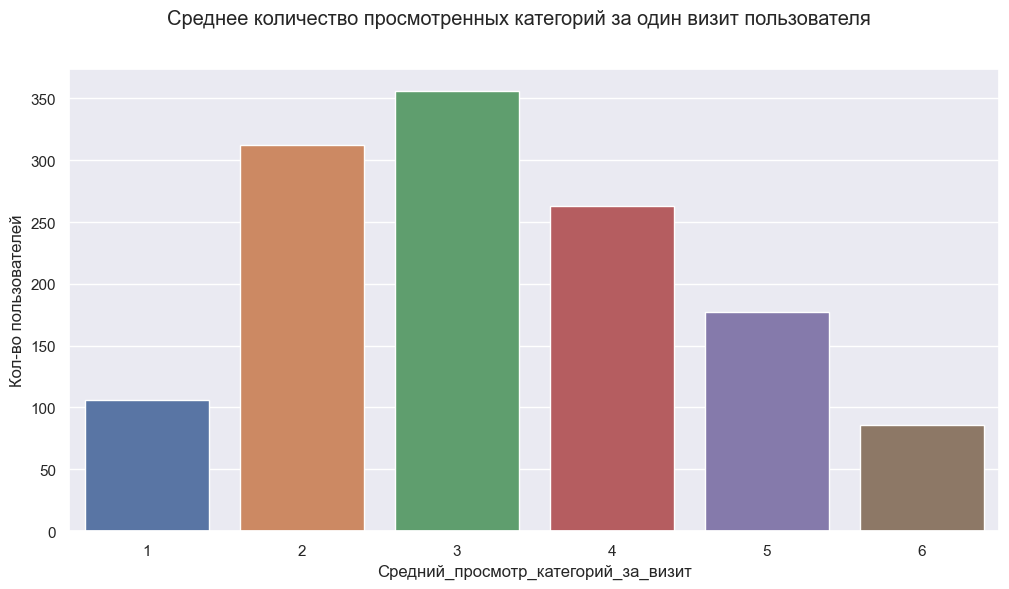

In [39]:
graphics_discrete(df_market_file, 'Средний_просмотр_категорий_за_визит', 
         'Среднее количество просмотренных категорий за один визит пользователя')

Пользователей, которые смотрят больше одной категории за визит больше, чем представителей другой категории. Возможно системы рекомендации предлагают пользователям товары на основе их поисков и прошлых покупок.

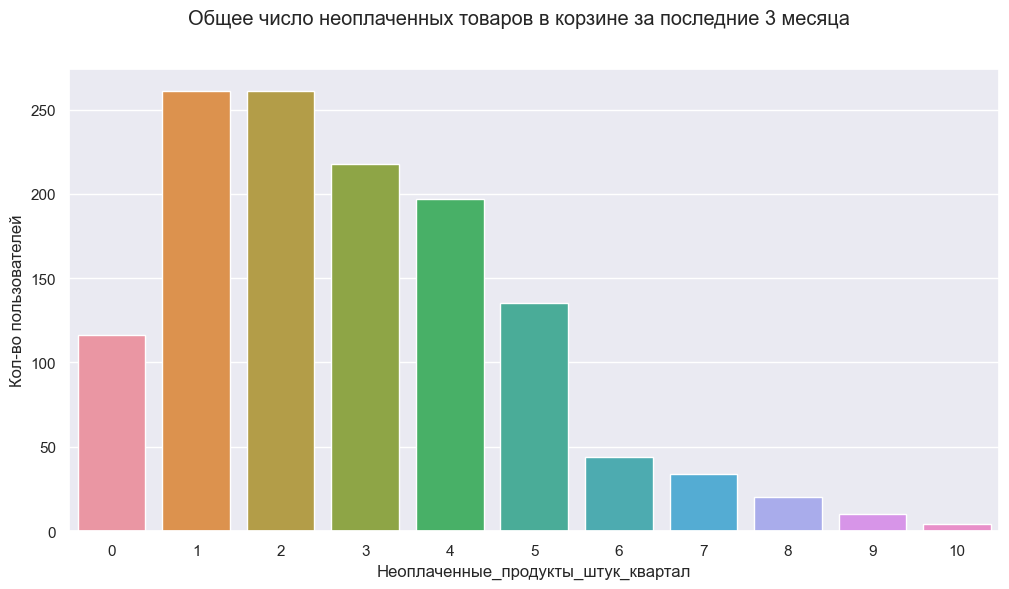

In [40]:
graphics_discrete(df_market_file, 'Неоплаченные_продукты_штук_квартал', 
         'Общее число неоплаченных товаров в корзине за последние 3 месяца')

На графике видно, что есть пользователи, которые оплачивают все корзины, при этом есть и те, кто часто не оплачивают. В среднем пользователи не оплачивают от 2 до 4 товаров в периоде за 3 месяца.

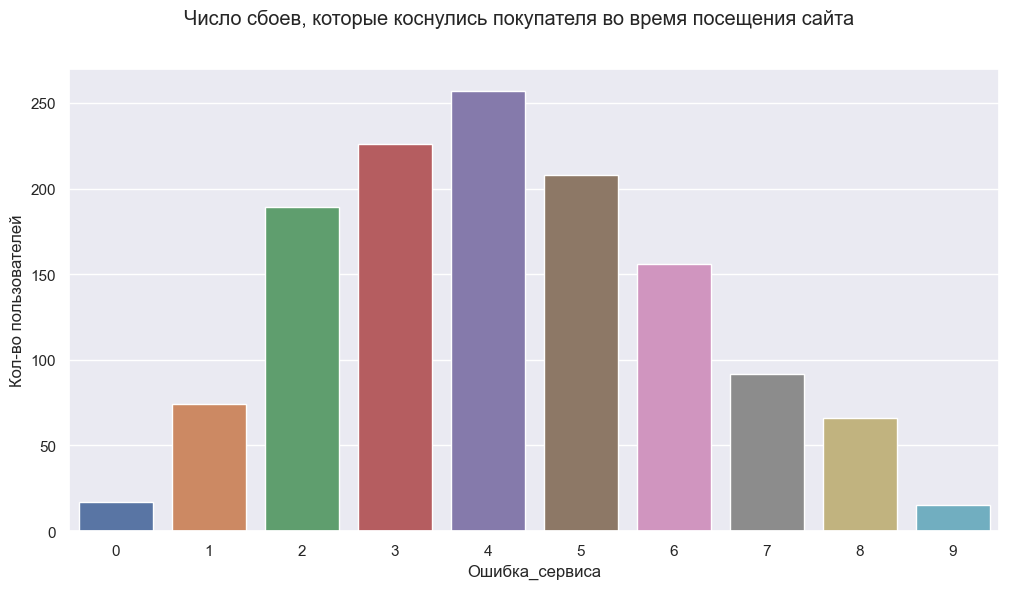

In [41]:
graphics_discrete(df_market_file, 'Ошибка_сервиса', 
         'Число сбоев, которые коснулись покупателя во время посещения сайта')

Выбросы отсуствуют, при этом измерить насколько критичны данные ошибки в пользовательском опыте - сложно, нужно проверять корреляцию данного фактора с другими, а также получить обратную связь по ним.

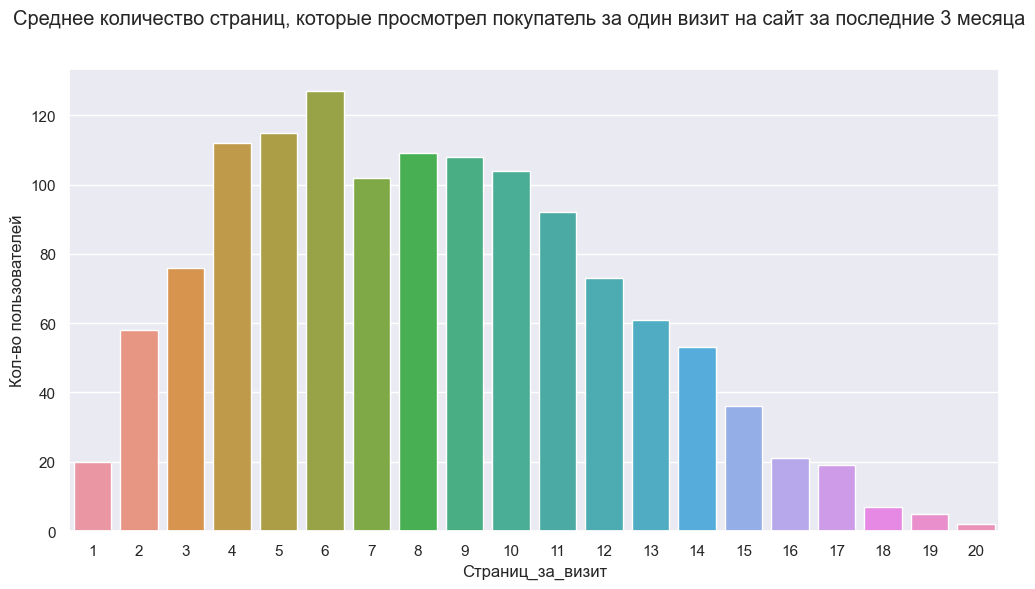

In [42]:
graphics_discrete(df_market_file, 'Страниц_за_визит', 
         'Среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца')

Пользователи достаточно часто посещают несколько страниц во время визита, возможно это связано с тем, что пользователи часто просматривают товары разных категорий.

In [43]:
df_market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


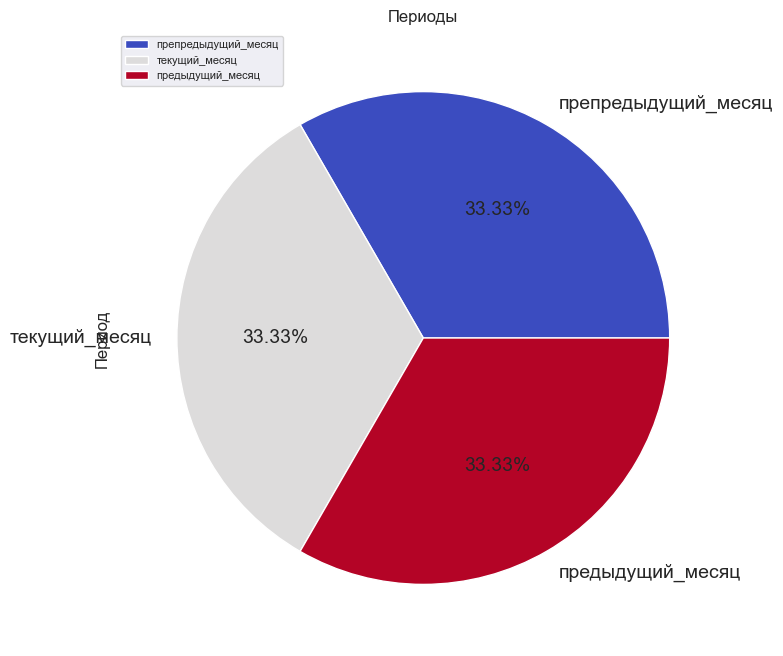

In [44]:
df_market_money['Период'].value_counts().plot(
    kind='pie', 
    figsize=(8, 8), 
    title='Периоды', 
    autopct='%.2f%%', 
    cmap='coolwarm',
    legend=True,
    fontsize=14)
plt.legend(loc='upper left', fontsize=8)

Период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
Выручка,4936.920385,4825.206923,5314.960846


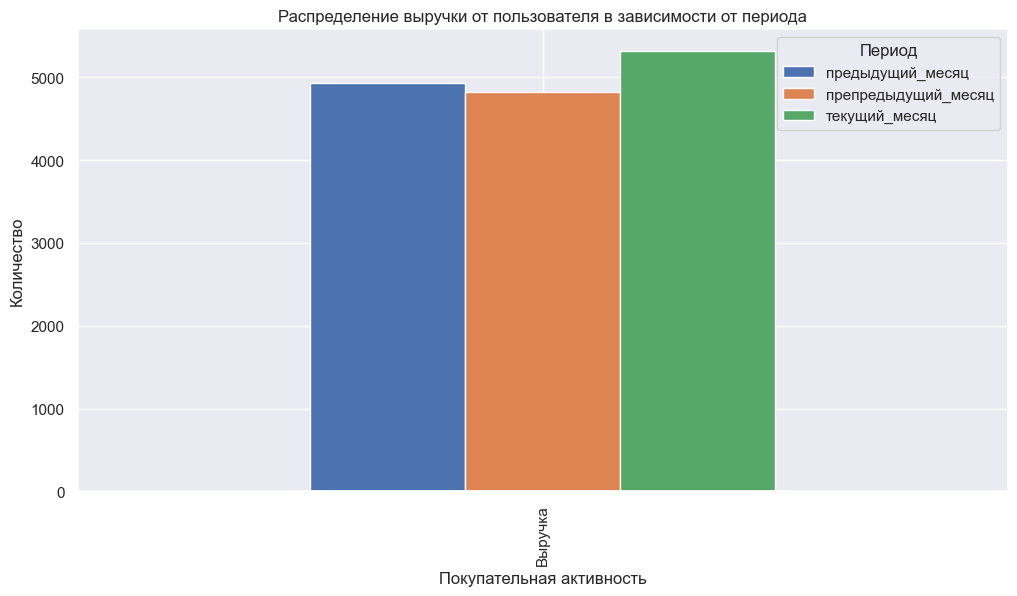

In [45]:
customer_value = df_market_money.pivot_table(columns='Период', 
                           values='Выручка',aggfunc='mean')
customer_value.plot(kind='bar', title='Распределение выручки от пользователя в зависимости от периода', 
                        xlabel='Покупательная активность', 
                        ylabel='Количество')
customer_value

Исходя из анализа датасета с выручкой, данный показатель относительно не сильно варируется, возможно текущая клиентская база достаточно активно пользуется сервисом.

In [46]:
df_market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


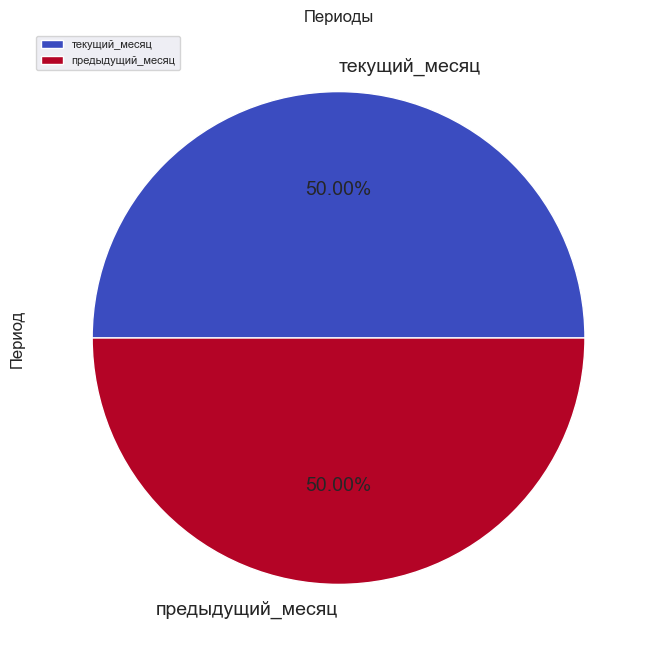

In [47]:
df_market_time['Период'].value_counts().plot(
    kind='pie', 
    figsize=(8, 8), 
    title='Периоды', 
    autopct='%.2f%%', 
    cmap='coolwarm',
    legend=True,
    fontsize=14)
plt.legend(loc='upper left', fontsize=8)

Период,предыдущий_месяц,текущий_месяц
минут,13.467692,13.204615


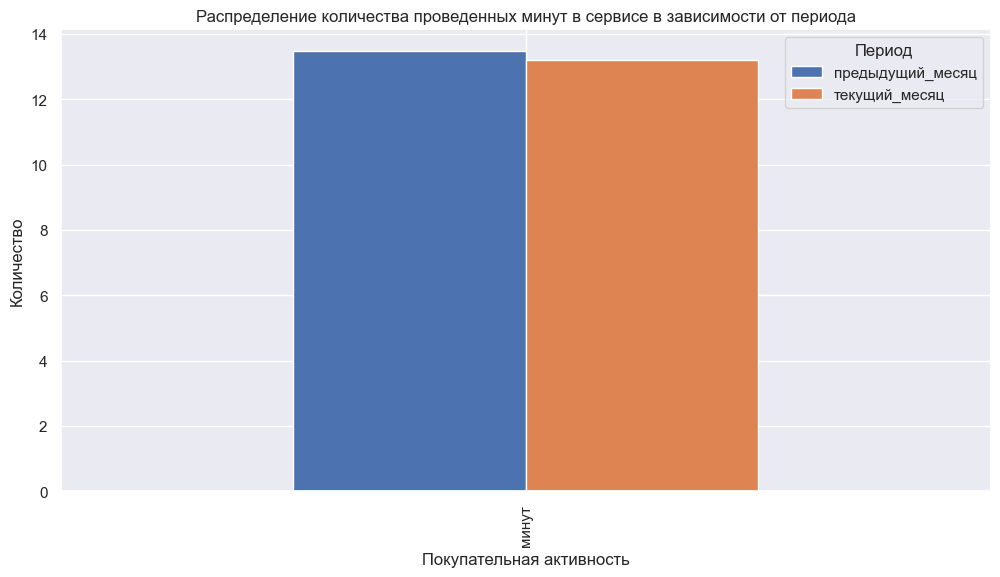

In [48]:
customer_time = df_market_time.pivot_table(columns='Период', 
                           values='минут',aggfunc='mean')
customer_time.plot(kind='bar', title='Распределение количества проведенных минут в сервисе в зависимости от периода', 
                        xlabel='Покупательная активность', 
                        ylabel='Количество')
customer_time

Критических отличий нет, пользователи проводят в среднем 13 минут за визит.

In [49]:
df_money.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


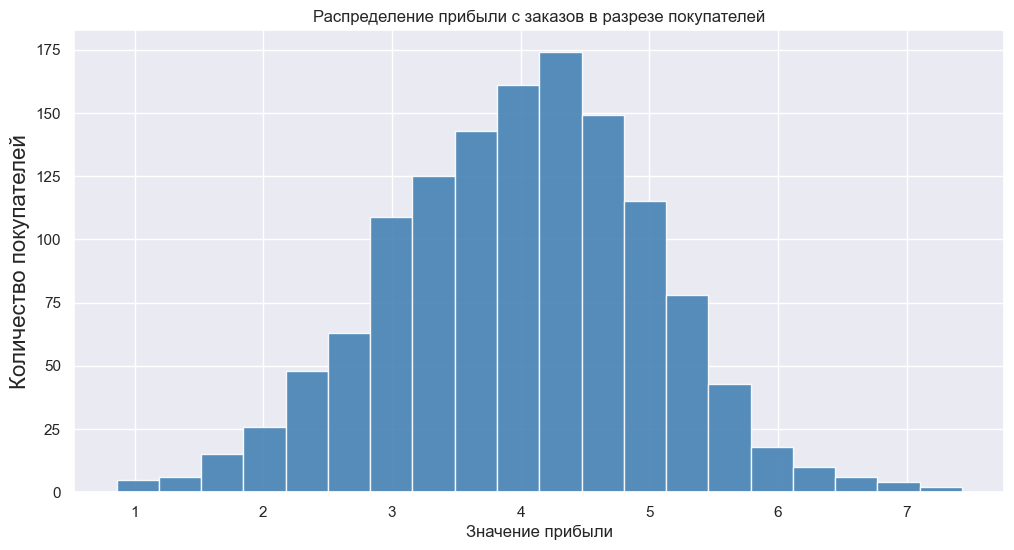

In [50]:
plt.hist(df_money['Прибыль'], bins=20, color='steelblue', ec='white', alpha=0.9)
plt.title('Распределение прибыли с заказов в разрезе покупателей')
plt.xlabel('Значение прибыли')
plt.ylabel('Количество покупателей', fontsize=16)
plt.show(close=None, block=None)

Значение прибыли распределено отнсительно нормально со смещением влево, скорее всего товары, представленные на маркетплейсе в целом находятся в одной ценовой категории и имеют схожую маржинальность.

In [51]:
df_market_money.query('Выручка == 0') ### Отберем покупателей с активностью в течение всех последних трех месяцев

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [52]:
for df in datasets:
    print('--------------')
    print(df.shape)

--------------
(1300, 13)
--------------
(2600, 3)
--------------
(3900, 3)
--------------
(1300, 2)


In [53]:
ids_to_drop = [215348, 215357, 215359]  # Идентификаторы пользователей, которых нужно удалить
for df in datasets:
    index_to_drop = df[df['id'].isin(ids_to_drop)].index
    df.drop(index_to_drop, inplace=True)

In [54]:
for df in datasets:
    print('--------------')
    print(df.shape)

--------------
(1297, 13)
--------------
(2594, 3)
--------------
(3891, 3)
--------------
(1297, 2)


Исключены три записи с пользователями, которые не покупали 2 прошлых месяца.

## Объединение таблиц

In [55]:
df_market_money_pivot = df_market_money.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum').reset_index()
df_market_money_pivot.rename(columns={'предыдущий_месяц': 'выручка_предыдущий_месяц', 
                                      'препредыдущий_месяц': 'выручка_препредыдущий_месяц', 
                                      'текущий_месяц': 'выручка_текущий_месяц'})
df_market_money_pivot.columns = ['id', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
df_market_money_pivot

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5
...,...,...,...,...
1292,216643,3664.0,4704.0,4741.7
1293,216644,4729.0,5299.0,5353.0
1294,216645,5160.0,5334.0,5139.2
1295,216646,4923.0,4725.0,5224.6


Таблица подготовлена, необходимые столбцы заведены для объединения.

In [56]:
df_market_time_pivot = df_market_time.pivot_table(index='id', columns='Период', values='минут').reset_index()
df_market_time_pivot.rename(columns={'предыдущий_месяц': 'время_предыдущий_месяц', 
                                      'текущий_месяц': 'время_текущий_месяц'})
df_market_time_pivot.columns = ['id', 'время_предыдущий_месяц', 'время_текущий_месяц']
df_market_time_pivot

,id,время_предыдущий_месяц,время_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10
...,...,...,...
1292,216643,14,7
1293,216644,12,11
1294,216645,12,18
1295,216646,18,7


Таблица подготовлена, необходимые столбцы заведены для объединения.

In [57]:
for i in [df_market_money_pivot, df_market_time_pivot]:
    display(i.shape)

(1297, 4)

(1297, 3)

Количество записей не отличается, можем объединять таблицы.

In [58]:
data_market = df_market_file.merge(df_market_money_pivot, on='id', how='left')
data_market = data_market.merge(df_market_time_pivot, on='id', how='left')
data_market.shape

(1297, 18)

In [59]:
# Преобразование наименований столбцов
new_columns = []
for col in data_market.columns:
    new_col = '_'.join(col.lower().split())
    new_columns.append(new_col)

data_market.columns = new_columns

In [60]:
data_market.sample(5)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
1142,216493,Прежний уровень,стандарт,да,5.3,4,129,0.21,Домашний текстиль,4,5,2,17,5371.5,4944.0,5872.0,16,9
752,216103,Прежний уровень,стандарт,нет,5.7,4,528,0.17,Мелкая бытовая техника и электроника,3,2,3,8,6194.5,4942.0,7410.0,15,12
892,216243,Прежний уровень,стандарт,да,3.3,5,812,0.11,Косметика и аксессуары,4,1,8,5,4438.0,5485.0,3660.6,12,19
637,215988,Прежний уровень,стандарт,да,4.4,3,910,0.11,Техника для красоты и здоровья,2,1,5,15,4422.0,4962.0,5021.3,16,19
99,215450,Снизилась,премиум,да,5.6,4,857,0.36,Кухонная посуда,3,4,6,5,6211.0,4849.0,7160.0,12,8


In [61]:
data_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [62]:
data_market.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,215998.986893,4.254433,4.009252,602.993832,0.320547,3.267540,2.841172,4.184271,8.186584,4948.339630,4836.367772,5316.449268,13.469545,13.211257
std,374.578554,1.015618,0.696048,249.101456,0.249657,1.354623,1.973451,1.950973,3.977061,701.228571,333.438742,2942.469139,3.936323,4.220222
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000,2890.000000,4098.000000,2758.700000,5.000000,4.000000
25%,215675.000000,3.700000,4.000000,410.000000,0.170000,2.000000,1.000000,3.000000,5.000000,4498.500000,4585.000000,4706.600000,11.000000,10.000000
50%,215999.000000,4.200000,4.000000,607.000000,0.240000,3.000000,3.000000,4.000000,8.000000,5005.500000,4812.000000,5180.300000,13.000000,13.000000
75%,216323.000000,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000,5409.000000,5055.000000,5761.300000,17.000000,16.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000,6869.500000,5663.000000,106862.200000,23.000000,23.000000


In [63]:
data_market.duplicated().sum()

0

In [64]:
data_market.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
время_предыдущий_месяц                 0
время_текущий_месяц                    0
dtype: int64

   Данные успешно объединены, явные дубликаты и пропуски отсутствуют - перейдем к коррялеционному анализу.

## Корреляционный анализ

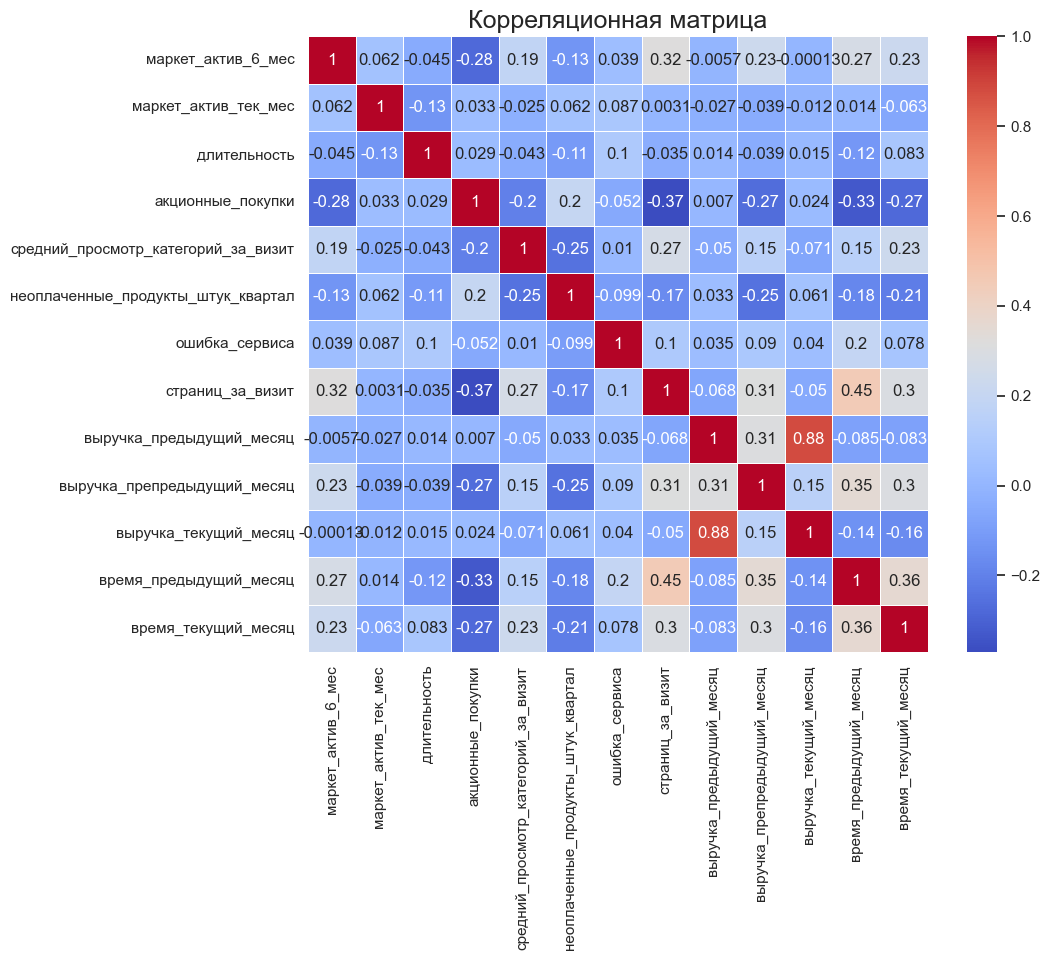

In [65]:
data_market_num = data_market.select_dtypes(include=['int64', 'float64']).drop(columns=['id'], errors='coerce')
spearman_corr = data_market_num.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица', fontsize=18)
plt.show()

In [66]:
X = sm.add_constant(data_market_num)

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                              variables         VIF
0                                 const  327.799100
1                    маркет_актив_6_мес    1.217963
2                  маркет_актив_тек_мес    1.044531
3                          длительность    1.099455
4                     акционные_покупки    1.190174
5   средний_просмотр_категорий_за_визит    1.176548
6    неоплаченные_продукты_штук_квартал    1.198762
7                        ошибка_сервиса    1.078474
8                      страниц_за_визит    1.394505
9              выручка_предыдущий_месяц    1.296558
10          выручка_препредыдущий_месяц    1.508342
11                выручка_текущий_месяц    1.097394
12               время_предыдущий_месяц    1.518416
13                  время_текущий_месяц    1.295933


+ Корреляционный анализ показал, что "покупательская активность" слабо коррелирует с маркетинговыми активностями (0.34) и акционными покупками (0.51). Среднее количество просмотров категорий за визит тоже демонстрирует низкую корреляцию (0.54). 
+ Средняя корреляция (0.75) наблюдается между целевым признаком и количеством просмотренных страниц за визит, а также с показателями времени, проведенного на сайте ('минут_предыдущий_месяц' и 'минут_текущий_месяц'), что указывает на положительную связь между временем на сайте и покупательской активностью.
+ Корреляция целевого признака (покупательская активность) с выручкой в разных периодах колеблется от очень слабой до слабой. Между 'выручка_предыдущий_месяц' и 'выручка_текущий_месяц' выявлена сильная корреляция (0.83), однако коэффициент VIF остается приемлемым (менее 5).
+ Более продолжительная регистрация на сайте коррелирует с такими показателями, как 'популярная_категория' (0.76), 'средний_просмотр_категорий_за_визит' (0.77) и 'неоплаченные_продукты_штук_квартал' (0.85), что говорит о большей активности старых пользователей. Высокая корреляция длительности регистрации с количеством товаров в корзине требует мер по стимулированию завершения покупок.

## Использование пайплайнов

In [67]:
# исключим id, чтобы он не влиял на прогноз
data_market = data_market.drop(columns=['id'], errors='coerce')

In [68]:
data_market.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
0,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [69]:
RANDOM_STATE = 42


target = data_market['покупательская_активность']
features = data_market.drop(['покупательская_активность'], axis=1)
print(target.sample(5))
features_train, features_test, target_train, target_test = (train_test_split(features, target, 
                                                                             random_state=RANDOM_STATE,
                                                                             stratify=target))

641     Прежний уровень
550           Снизилась
1200    Прежний уровень
966     Прежний уровень
1070    Прежний уровень
Name: покупательская_активность, dtype: object


In [70]:
label_encoder = LabelEncoder()
target_train = label_encoder.fit_transform(target_train)
target_test = label_encoder.transform(target_test)

In [71]:
datasets = [features_train, features_test, target_train, target_test]
for i in datasets:
    print(i.shape)

(972, 16)
(325, 16)
(972,)
(325,)


In [72]:
ord_columns = ['разрешить_сообщать', 'тип_сервиса']
ohe_columns = ['популярная_категория']
num_columns = features.select_dtypes(include=['int64', 'float64']).columns

In [73]:
s_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ohe_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
pipe_cat = Pipeline([('imputer', s_imputer), ('ord', ord_encoder)])
pipe_ord = Pipeline([('imputer', s_imputer), ('ohe', ohe_encoder)])

In [74]:
simple_imputer = SimpleImputer(strategy='median')
std_scaler = StandardScaler()
pipe_num = Pipeline([('imputer', simple_imputer), ('scaler', std_scaler)])

In [75]:
data_preprocessor = ColumnTransformer(
    [
        ('cat', pipe_cat, ohe_columns),
        ('num', pipe_num, num_columns),
        ('ord', pipe_ord, ord_columns)
    ], 
    remainder='passthrough'
)
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', None)
    ]
)

In [76]:
common_preprocessors = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
}

param_grid = [
    {
        **common_preprocessors,
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__min_samples_leaf': range(2, 13, 2),
        'models__min_samples_split': range(2, 4),
    },
    {
        **common_preprocessors,
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 11)
    },
    {
        **common_preprocessors,
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10],
        'models__penalty': ['l1', 'l2', None]
    },
    {
        **common_preprocessors,
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 1, 10],
        'models__gamma': [0.1, 1, 10]
    }
]

Параметры для 4 моделей (KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC()) заведены, приступим к поиску оптимальных параметров. Используем метод GridSearch, поскольку количество строк не такое большое, не будет затрачено так много ресурсов, при этом можем мы получить наиболее точные результаты.

In [77]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    refit=True
)

grid_search.fit(features_train, target_train)

print('Параметры лучшей модели:\n\n', grid_search.best_estimator_)
print()
print(f'Метрика на кросс-валидации: {grid_search.best_score_:.3f}')
print()

target_test_proba = grid_search.predict_proba(features_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(target_test, target_test_proba):.3f}')

/Users/arslonshaydamov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arslonshaydamov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arslonshaydamov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arslonshaydamov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arslonshaydamov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/arslonshaydamov/an

Параметры лучшей модели:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['популярная_категория']),
                                                 ('num', StandardScaler(),
                                                  Index(['маркет_актив_6_мес', 'маркет_акт

/Users/arslonshaydamov/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arslonshaydamov/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arslonshaydamov/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/arslonshaydamov/anaconda3/lib/python3.11/site

Изучив различные модели, их гиперпараметры и методы масштабирования/кодирования, наилучший результат по метрике "ROC-AUC" показала модель SVC (параметры C=1, gamma=0.1, probability=True). Качество модели при кросс-валидации составило 91,7%. Расчет этой же метрики на тестовой выборке дал результат около 91,4% что является хорошим результатом, так как он значительно превосходит порог случайного угадывания (0.5) и показывает высокую точность модели.

## Анализ важности признаков

In [78]:
features_train_shap = pd.DataFrame(pipe_final.named_steps['preprocessor'].fit_transform(features_train), 
                            columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

features_test_shap = pd.DataFrame(pipe_final.named_steps['preprocessor'].transform(features_test), 
                           columns=pipe_final.named_steps['preprocessor'].get_feature_names_out())

explainer = shap.KernelExplainer(grid_search.best_estimator_.named_steps['models'].predict_proba, features_train_shap[:100])
shap_values = explainer(features_test_shap[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

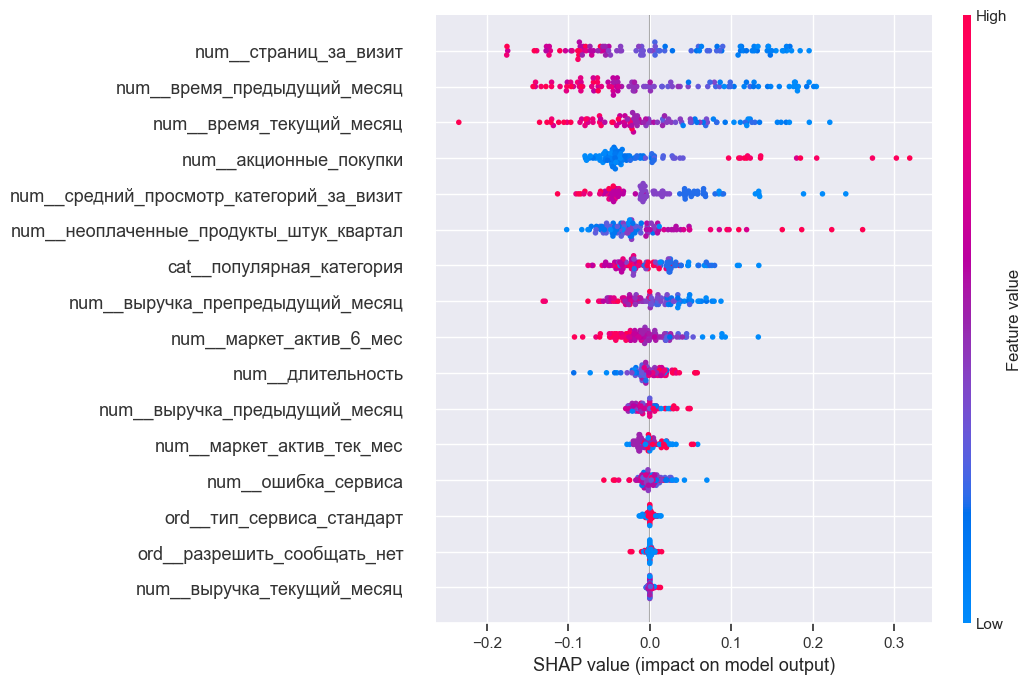

In [79]:
shap.plots.beeswarm(shap_values[:,:,1], max_display=20) 

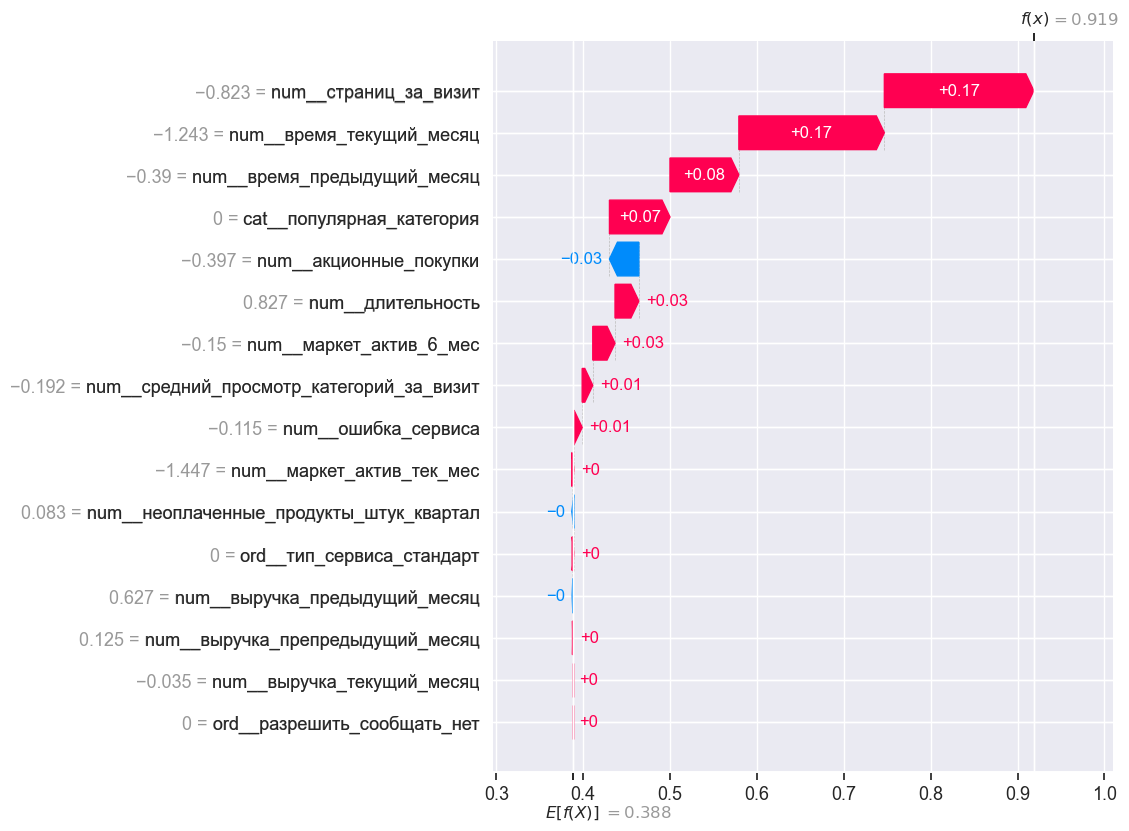

In [80]:
shap.plots.waterfall(shap_values[1,:,1], max_display=20)

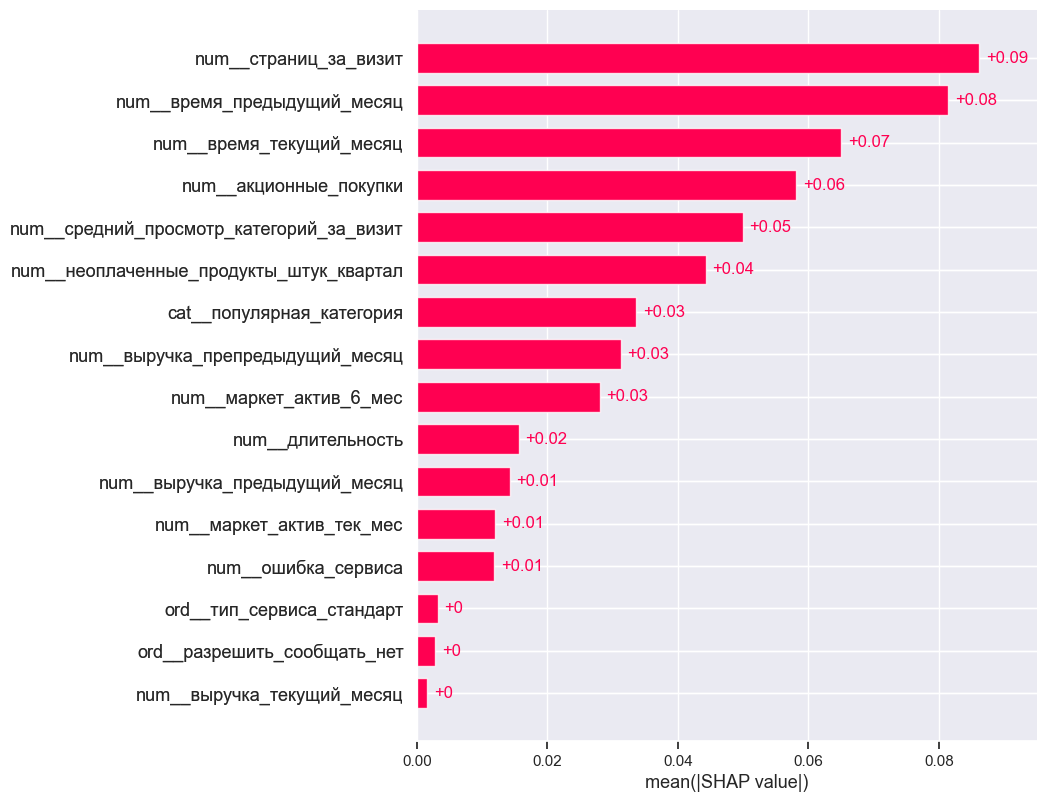

In [81]:
shap.plots.bar(shap_values[:,:,1], max_display=20)

Выводы:
Среди всех признаков, являющихся наиболее важными в процессе принятия решений, реализуемом моделью, можно выделить следующие четыре признака:
+ 'акционные покупки' - направляет предсказания к классу 0 (снизилась);
+ 'время_предыдущий_месяц' - направляет предсказания к классу 1 (осталась прежней);
+ 'время_текущий_месяц' - направляет предсказания к классу 1 (осталась прежней);
+ 'страниц за визит'- направляет предсказания к классу 1 (осталась прежней).

## Сегментация покупателей

Прежде чем провести анализ когорты пользователей, объединим все датасеты и приведем все наименования столбцов к snake_case.

In [82]:
data_market_2 = df_market_file.merge(df_market_money_pivot, on='id', how='left')
data_market_2 = data_market_2.merge(df_market_time_pivot, on='id', how='left')
data_market_2 = data_market_2.merge(df_money, on='id', how='left')

In [83]:
data_market_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   Покупательская активность            1297 non-null   object 
 2   Тип сервиса                          1297 non-null   object 
 3   Разрешить сообщать                   1297 non-null   object 
 4   Маркет_актив_6_мес                   1297 non-null   float64
 5   Маркет_актив_тек_мес                 1297 non-null   int64  
 6   Длительность                         1297 non-null   int64  
 7   Акционные_покупки                    1297 non-null   float64
 8   Популярная_категория                 1297 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  Ошибка_сервиса                

In [84]:
# Преобразование наименований столбцов
new_columns = []
for col in data_market_2.columns:
    new_col = '_'.join(col.lower().split())
    new_columns.append(new_col)

data_market_2.columns = new_columns

In [85]:
data_market_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [86]:
data_market_2.sample(5)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,прибыль
302,215653,Снизилась,стандарт,нет,5.6,5,181,0.31,Мелкая бытовая техника и электроника,1,5,3,4,5121.0,4719.0,5854.2,7,13,3.54
135,215486,Снизилась,премиум,да,3.5,4,1021,0.35,Косметика и аксессуары,2,4,3,5,4478.0,4469.0,4517.0,9,13,4.12
1179,216530,Прежний уровень,стандарт,нет,4.9,3,362,0.24,Товары для детей,4,1,5,12,5388.0,5118.0,5280.1,17,15,5.23
865,216216,Прежний уровень,премиум,да,3.9,4,324,0.23,Мелкая бытовая техника и электроника,3,3,5,4,5956.0,5092.0,6834.8,15,14,3.57
418,215769,Прежний уровень,стандарт,нет,3.6,3,553,0.23,Домашний текстиль,5,3,3,10,4976.5,4495.0,5523.8,12,9,4.98


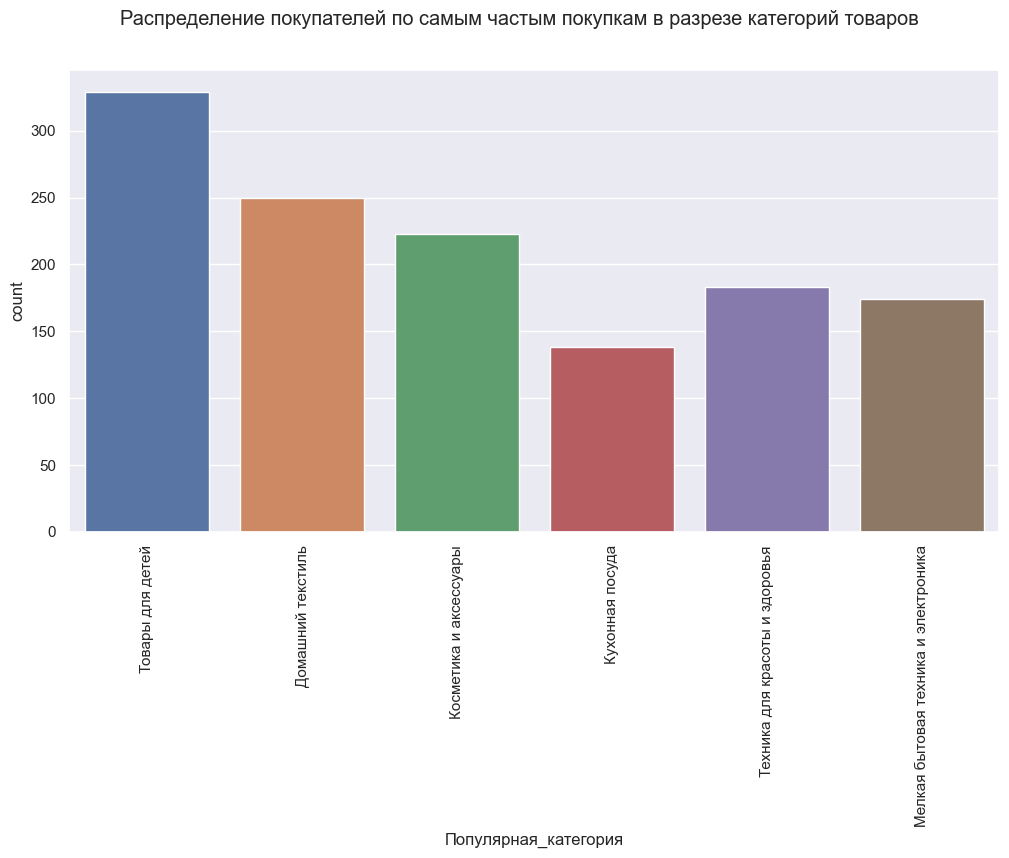

<Figure size 2500x1000 with 0 Axes>

In [87]:
graphics_cow(df_market_file, 'Популярная_категория', 
             'Распределение покупателей по самым частым покупкам в разрезе категорий товаров')

Как можем заметить, наименьшее количество покупок у категории "Кухонная посуда". Проверим данный сегмент на отличия от всего датасета.

In [88]:
data_dishes = data_market_2.loc[data_market_2['популярная_категория'] == 'Кухонная посуда']
data_dishes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 9 to 1289
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   138 non-null    int64  
 1   покупательская_активность            138 non-null    object 
 2   тип_сервиса                          138 non-null    object 
 3   разрешить_сообщать                   138 non-null    object 
 4   маркет_актив_6_мес                   138 non-null    float64
 5   маркет_актив_тек_мес                 138 non-null    int64  
 6   длительность                         138 non-null    int64  
 7   акционные_покупки                    138 non-null    float64
 8   популярная_категория                 138 non-null    object 
 9   средний_просмотр_категорий_за_визит  138 non-null    int64  
 10  неоплаченные_продукты_штук_квартал   138 non-null    int64  
 11  ошибка_сервиса                 

In [89]:
data_dishes.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,прибыль
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,215934.652174,4.083333,4.130435,627.108696,0.362101,2.898551,3.079710,4.028986,6.840580,5206.688406,4820.659420,5556.614493,13.427536,13.173913,4.062609
std,389.074171,0.918073,0.692252,268.555794,0.272594,1.082642,2.289492,1.910180,3.413683,606.889503,350.761081,880.596010,3.909352,4.213141,0.898244
min,215360.000000,1.400000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000,3623.000000,4102.000000,3227.000000,5.000000,6.000000,1.390000
25%,215577.500000,3.500000,4.000000,404.500000,0.210000,2.000000,1.000000,2.000000,4.000000,4857.125000,4578.250000,4972.975000,11.000000,10.000000,3.425000
50%,215857.500000,4.100000,4.000000,666.000000,0.270000,3.000000,3.000000,4.000000,6.000000,5259.500000,4808.000000,5584.150000,13.000000,13.000000,4.105000
75%,216259.250000,4.600000,5.000000,864.500000,0.350000,3.750000,5.000000,5.000000,9.000000,5600.250000,4997.750000,6140.550000,16.000000,16.000000,4.630000
max,216640.000000,6.300000,5.000000,1076.000000,0.990000,6.000000,9.000000,9.000000,17.000000,6716.500000,5638.000000,7799.400000,23.000000,23.000000,6.650000


In [90]:
data_dishes.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
время_предыдущий_месяц                 0
время_текущий_месяц                    0
прибыль                                0
dtype: int64

<Axes: title={'center': 'Распределение прибыли по покупателя категории "Кухонная посуда"'}, xlabel='прибыль'>

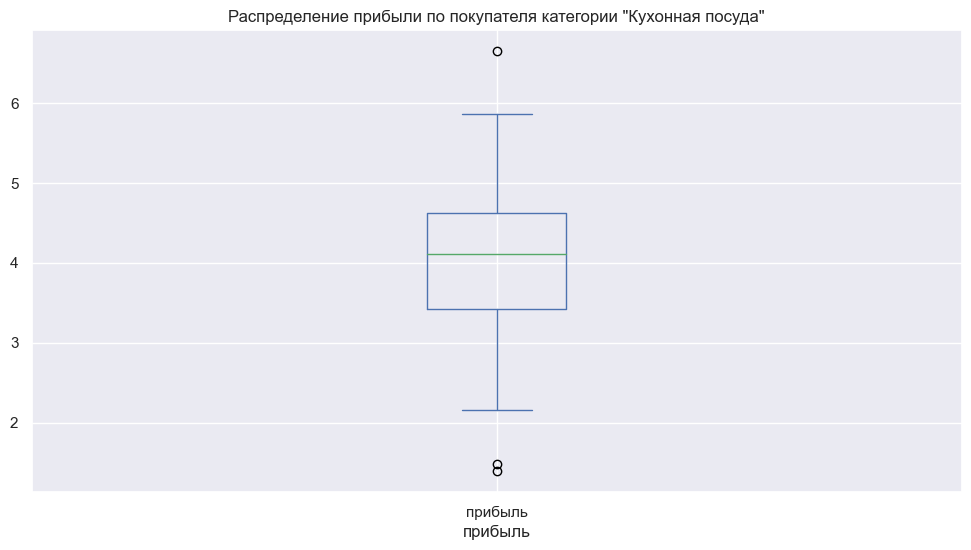

In [91]:
data_dishes['прибыль'].plot(kind='box', title='Распределение прибыли по покупателя категории "Кухонная посуда"', 
                        xlabel='прибыль')

<Axes: title={'center': 'Распределение прибыли по покупателям по всем категориям'}, xlabel='прибыль'>

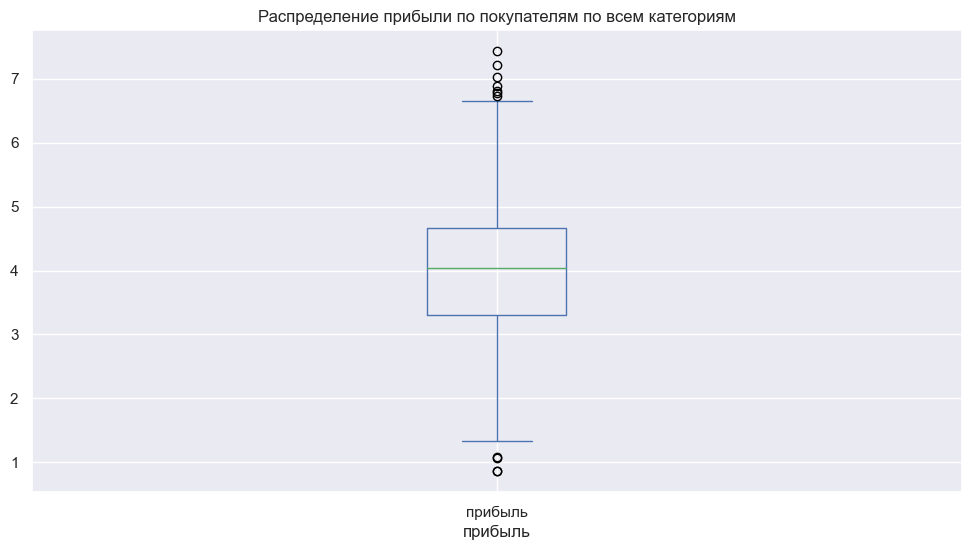

In [92]:
data_market_2['прибыль'].plot(kind='box', title='Распределение прибыли по покупателям по всем категориям', 
                        xlabel='прибыль')

Прибыльность не отличается, видимо товары не стоят так дорого, как могли бы относительно всего ассортимента.

<Axes: title={'center': 'Распределение прибыли по всем покупателям'}, ylabel='Frequency'>

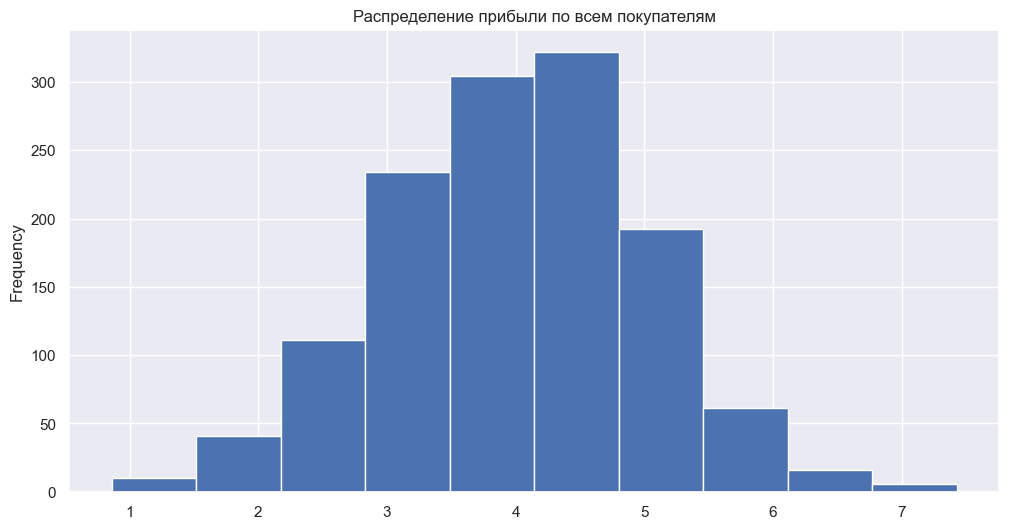

In [93]:
data_market_2['прибыль'].plot(kind='hist', title='Распределение прибыли по всем покупателям', 
                        xlabel='прибыль', ylabel='Кол-во попкупателей')

<Axes: title={'center': 'Распределение прибыли по покупателям категории "Кухонная посуда"'}, ylabel='Frequency'>

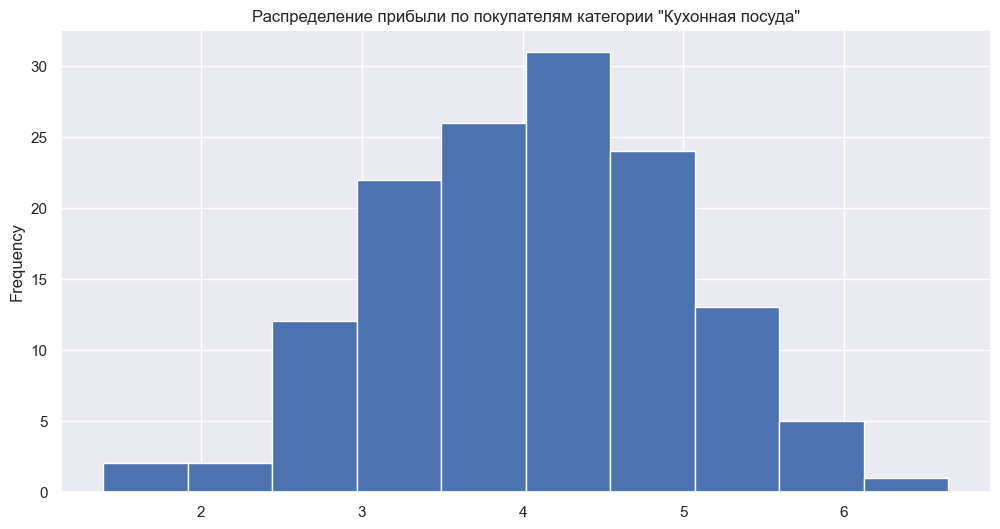

In [94]:
data_dishes['прибыль'].plot(kind='hist', title='Распределение прибыли по покупателям категории "Кухонная посуда"', 
                        xlabel='прибыль', ylabel='Кол-во попкупателей')

В распределении разительных отличий не заметно.

<Axes: title={'center': 'Распределение покупок по акции по покупателям выбранной категории'}, xlabel='акционные_покупки', ylabel='Кол-во попкупателей'>

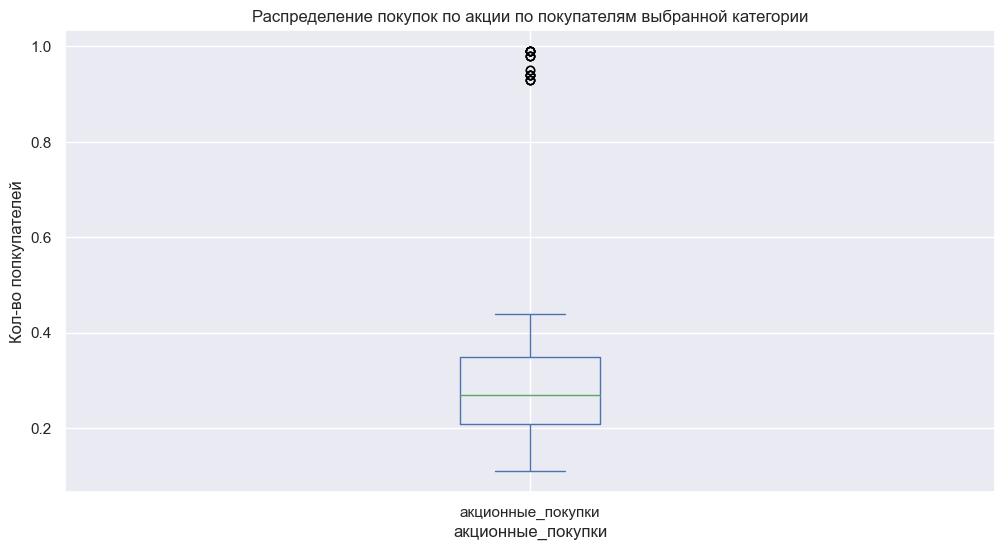

In [95]:
data_dishes['акционные_покупки'].plot(kind='box', title='Распределение покупок по акции по покупателям выбранной категории', 
                        xlabel='акционные_покупки', ylabel='Кол-во попкупателей')

<Axes: title={'center': 'Распределение покупок по акции по всем покупателям'}, xlabel='акционные_покупки'>

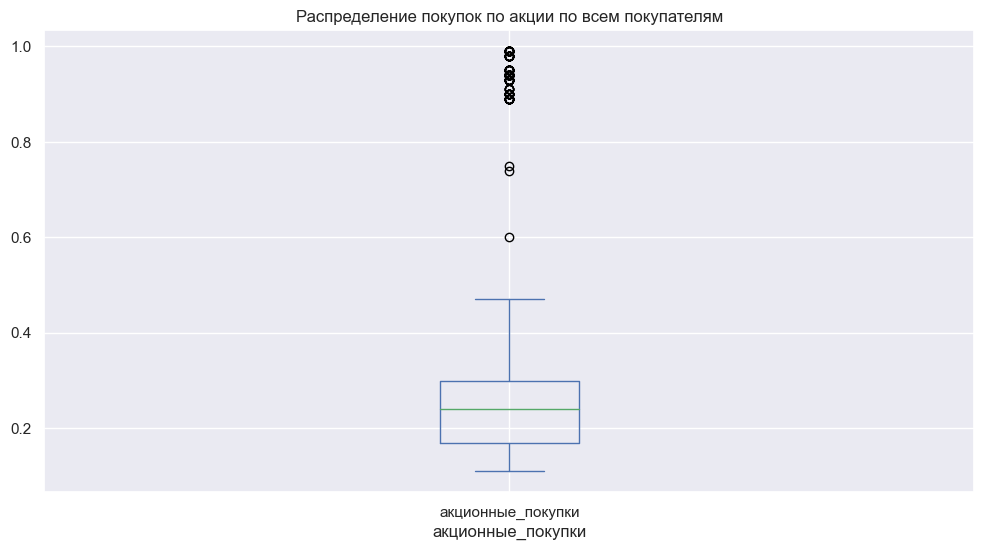

In [96]:
data_market_2['акционные_покупки'].plot(kind='box', title='Распределение покупок по акции по всем покупателям', 
                        xlabel='акционные_покупки')

Акции несильно влияют на распределение покупок, отличий не выявлено.

<Axes: title={'center': 'Распределение покупок по акции по покупателям данной категории'}, ylabel='Frequency'>

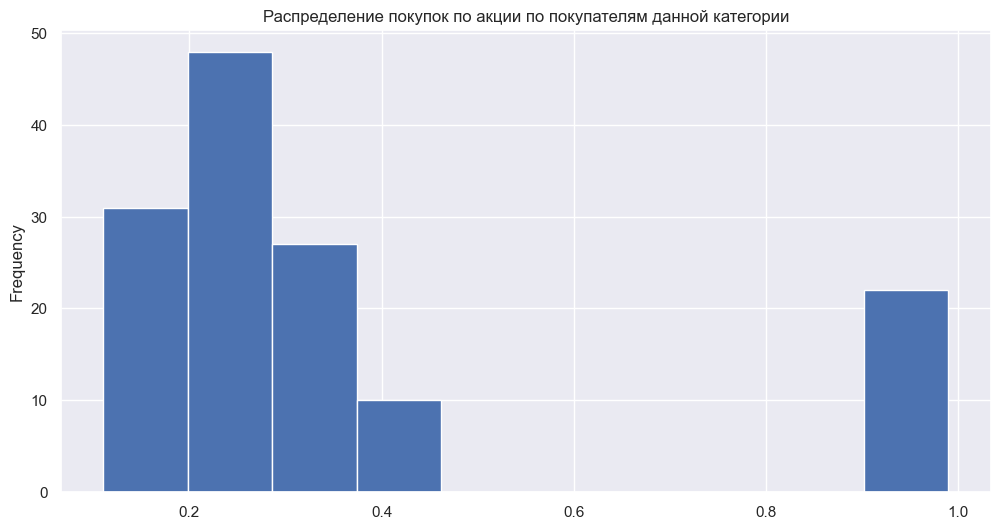

In [97]:
data_dishes['акционные_покупки'].plot(kind='hist', title='Распределение покупок по акции по покупателям данной категории', 
                        xlabel='прибыль', ylabel='Кол-во попкупателей')

<Axes: title={'center': 'Распределение акционных покупок по покупателям по всем категориям'}, ylabel='Frequency'>

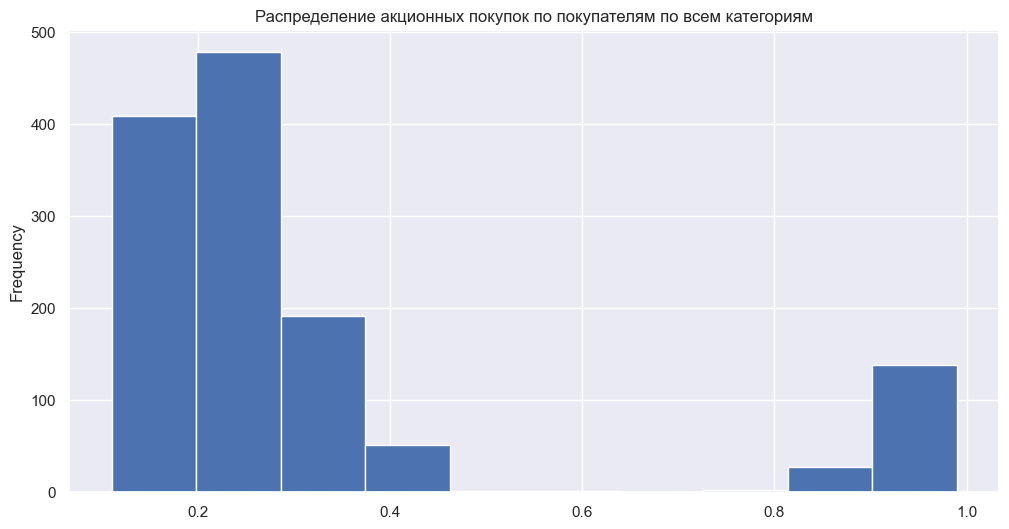

In [98]:
data_market_2['акционные_покупки'].plot(kind='hist', title='Распределение акционных покупок по покупателям по всем категориям', 
                        xlabel='прибыль')

<Axes: title={'center': 'Распределение неоплаченных покупок по покупателям данной категории'}, xlabel='неоплаченные_продукты_штук_квартал', ylabel='Кол-во попкупателей'>

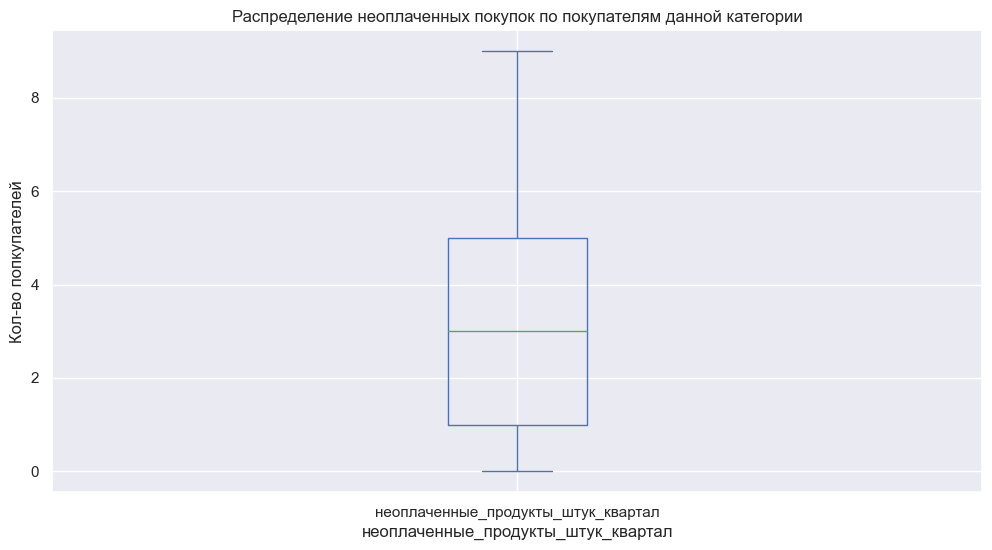

In [99]:
data_dishes['неоплаченные_продукты_штук_квартал'].plot(kind='box', title='Распределение неоплаченных покупок по покупателям данной категории', 
                        xlabel='неоплаченные_продукты_штук_квартал', ylabel='Кол-во попкупателей')

<Axes: title={'center': 'Распределение неоплаченных покупок'}, xlabel='неоплаченные_продукты_штук_квартал'>

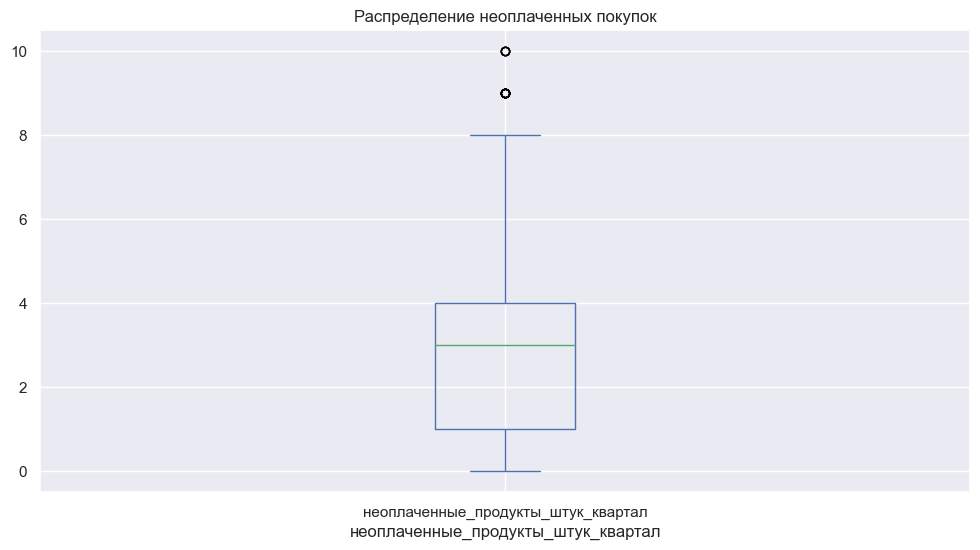

In [100]:
data_market_2['неоплаченные_продукты_штук_квартал'].plot(kind='box', title='Распределение неоплаченных покупок', 
                        xlabel='неоплаченные_продукты_штук_квартал')

При этом товары рассматриваемой категории оплачивают чаще, чем во всем датасете, нужно проверить другие признаки.

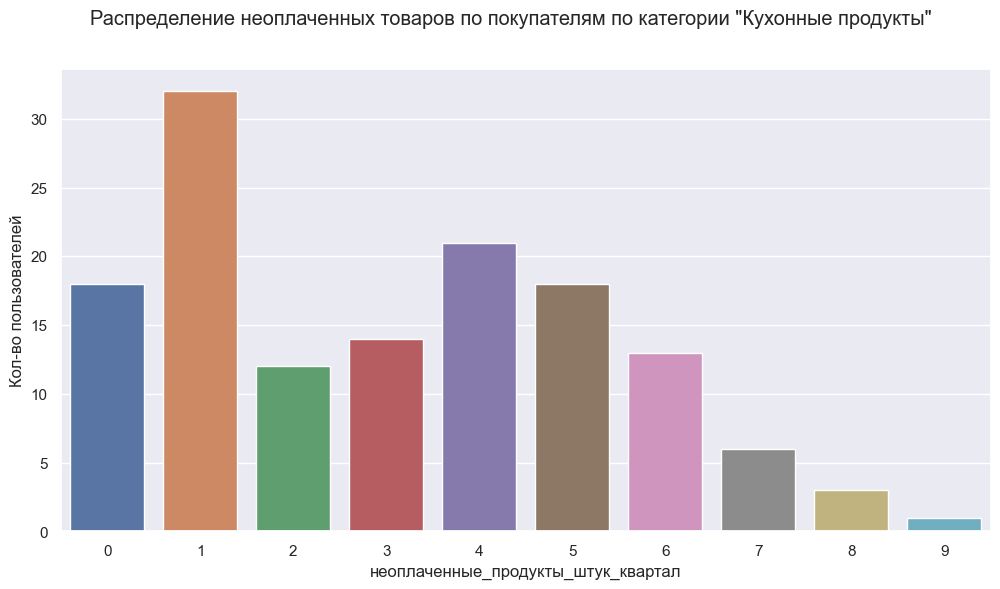

In [101]:
graphics_discrete(data_dishes,'неоплаченные_продукты_штук_квартал', 
                  'Распределение неоплаченных товаров по покупателям по категории "Кухонные продукты"')

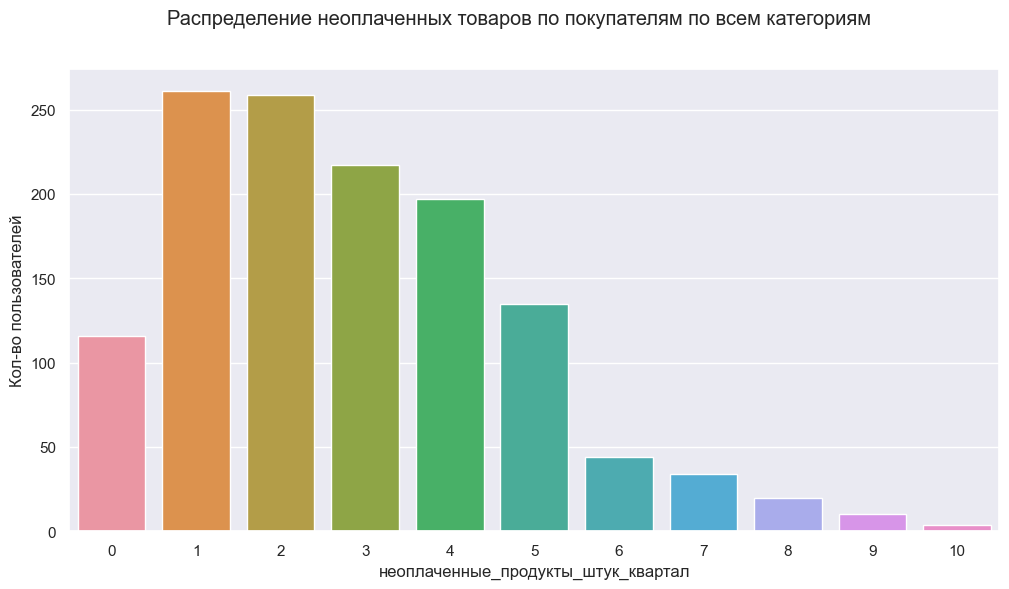

In [102]:
graphics_discrete(data_market_2,'неоплаченные_продукты_штук_квартал', 
                  'Распределение неоплаченных товаров по покупателям по всем категориям')

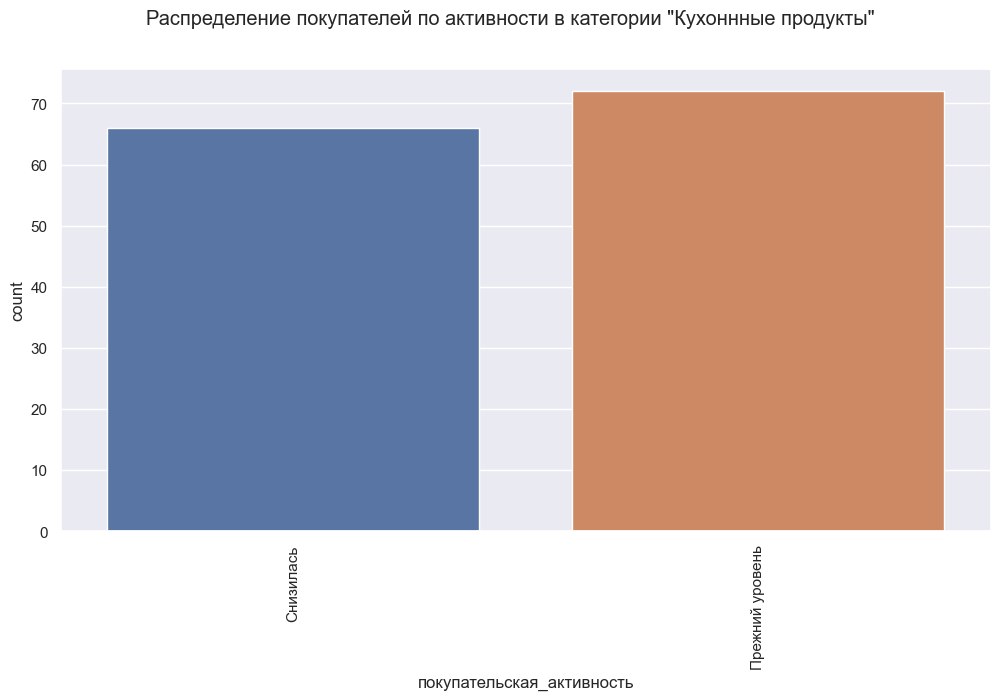

<Figure size 2500x1000 with 0 Axes>

In [103]:
graphics_cow(data_dishes, 'покупательская_активность','Распределение покупателей по активности в категории "Кухоннные продукты"')

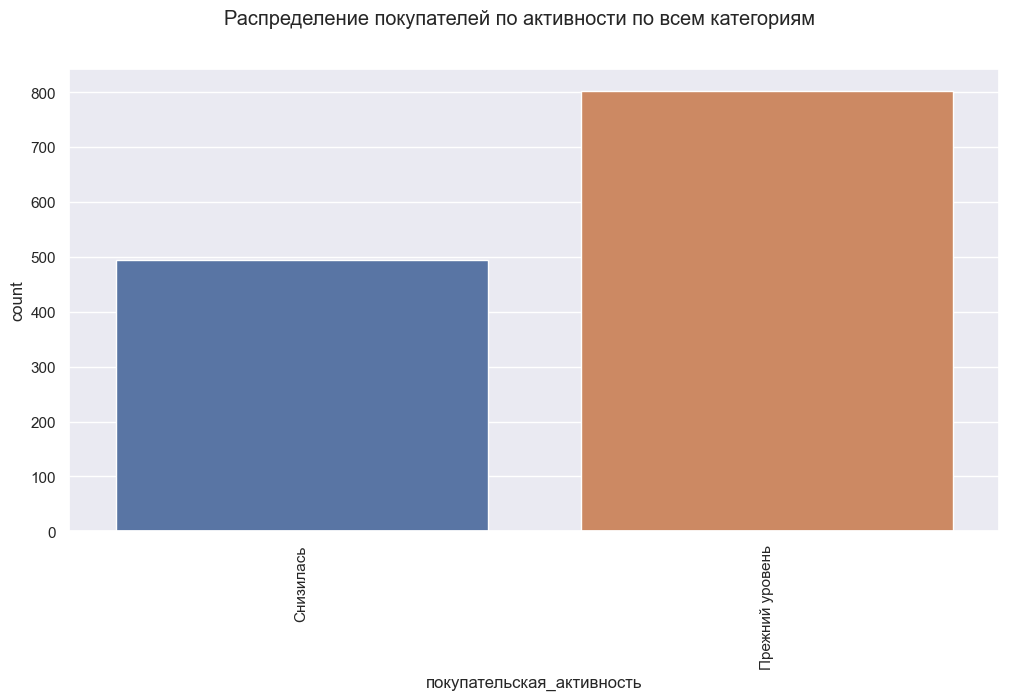

<Figure size 2500x1000 with 0 Axes>

In [104]:
graphics_cow(data_market_2, 'покупательская_активность', 
             'Распределение покупателей по активности по всем категориям')

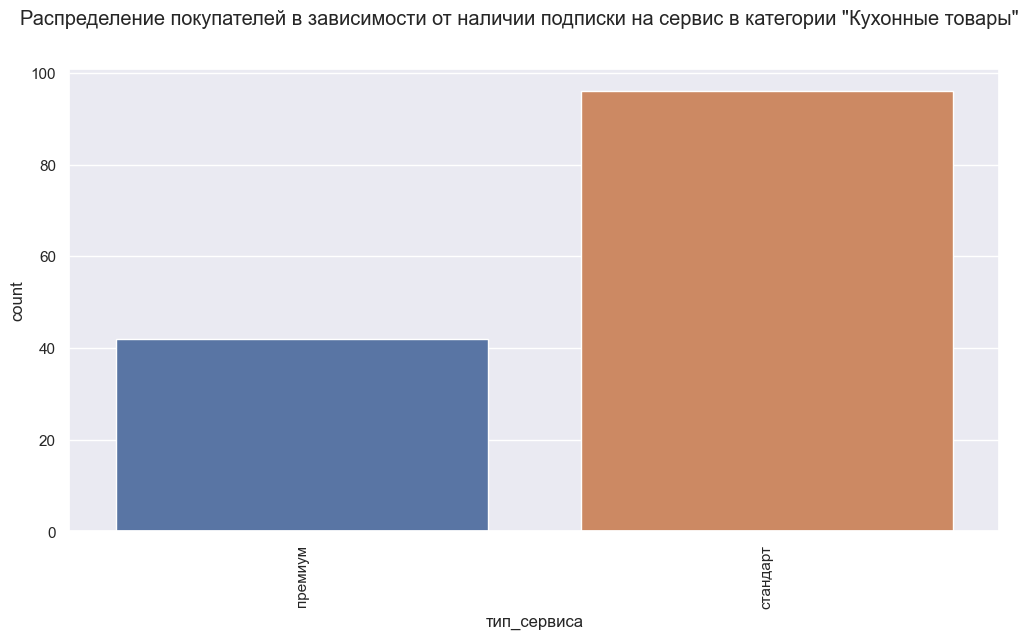

<Figure size 2500x1000 with 0 Axes>

In [105]:
graphics_cow(data_dishes, 'тип_сервиса', 
             'Распределение покупателей в зависимости от наличии подписки на сервис в категории "Кухонные товары"')

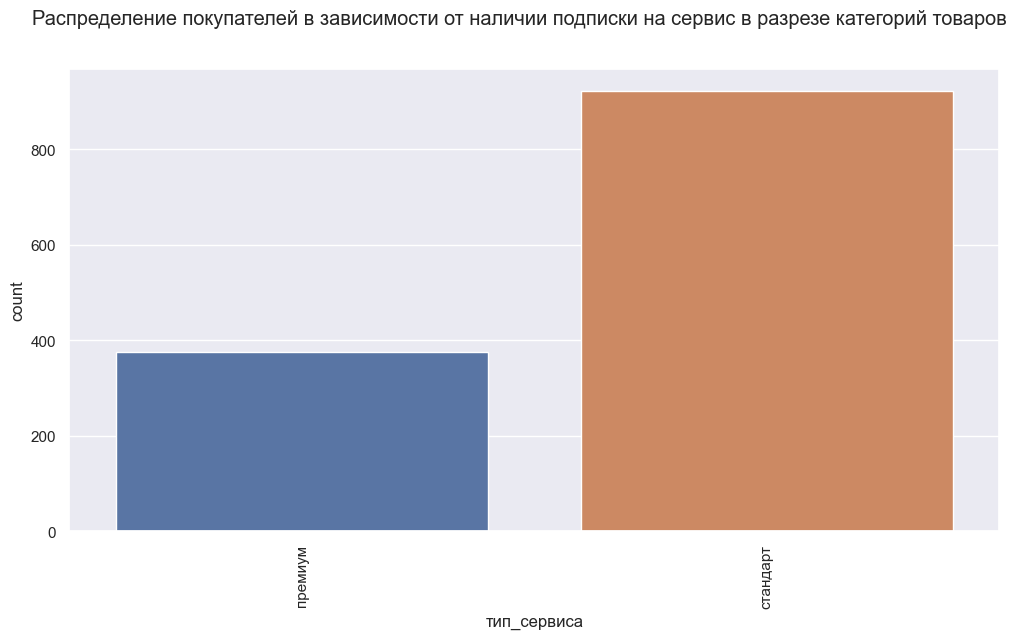

<Figure size 2500x1000 with 0 Axes>

In [106]:
graphics_cow(data_market_2, 'тип_сервиса', 
             'Распределение покупателей в зависимости от наличии подписки на сервис в разрезе категорий товаров')

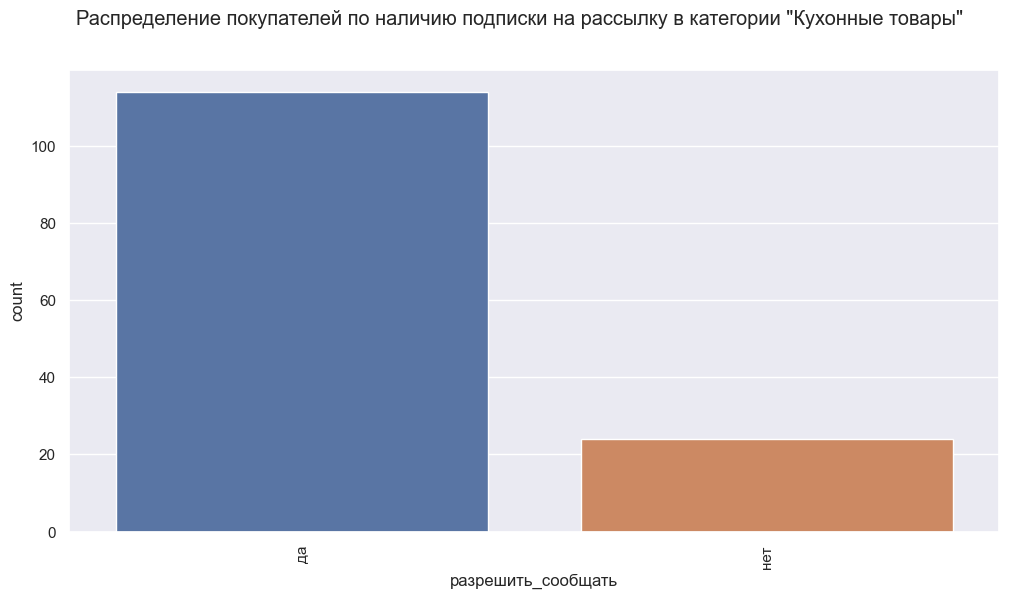

<Figure size 2500x1000 with 0 Axes>

In [107]:
graphics_cow(data_dishes, 'разрешить_сообщать', 
             'Распределение покупателей по наличию подписки на рассылку в категории "Кухонные товары"')

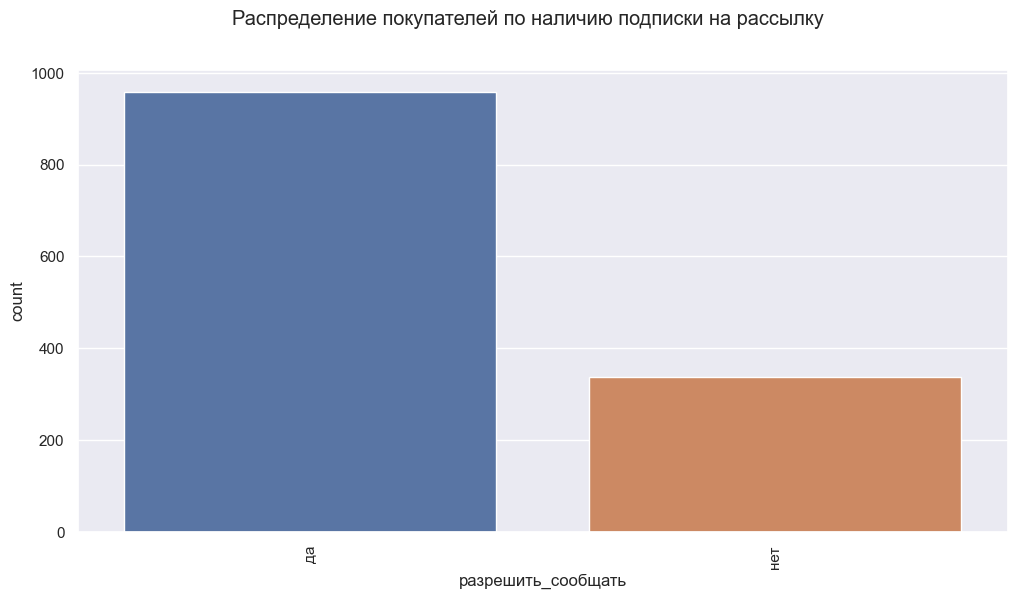

<Figure size 2500x1000 with 0 Axes>

In [108]:
graphics_cow(data_market_2, 'разрешить_сообщать', 
             'Распределение покупателей по наличию подписки на рассылку')

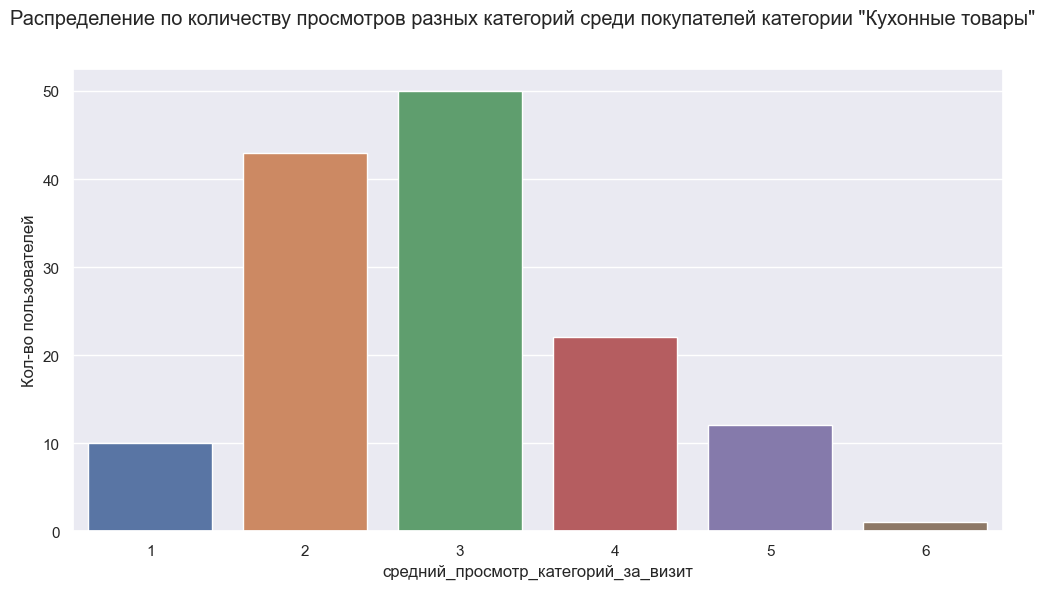

In [109]:
graphics_discrete(data_dishes, 'средний_просмотр_категорий_за_визит', 
             'Распределение по количеству просмотров разных категорий среди покупателей категории "Кухонные товары"')

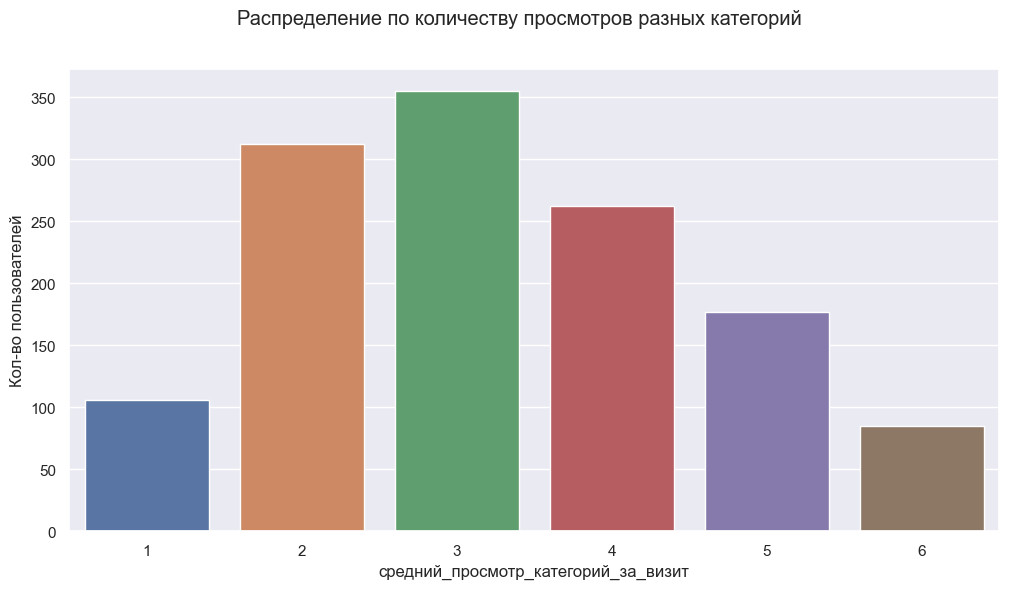

In [110]:
graphics_discrete(data_market_2, 'средний_просмотр_категорий_за_визит', 
             'Распределение по количеству просмотров разных категорий')

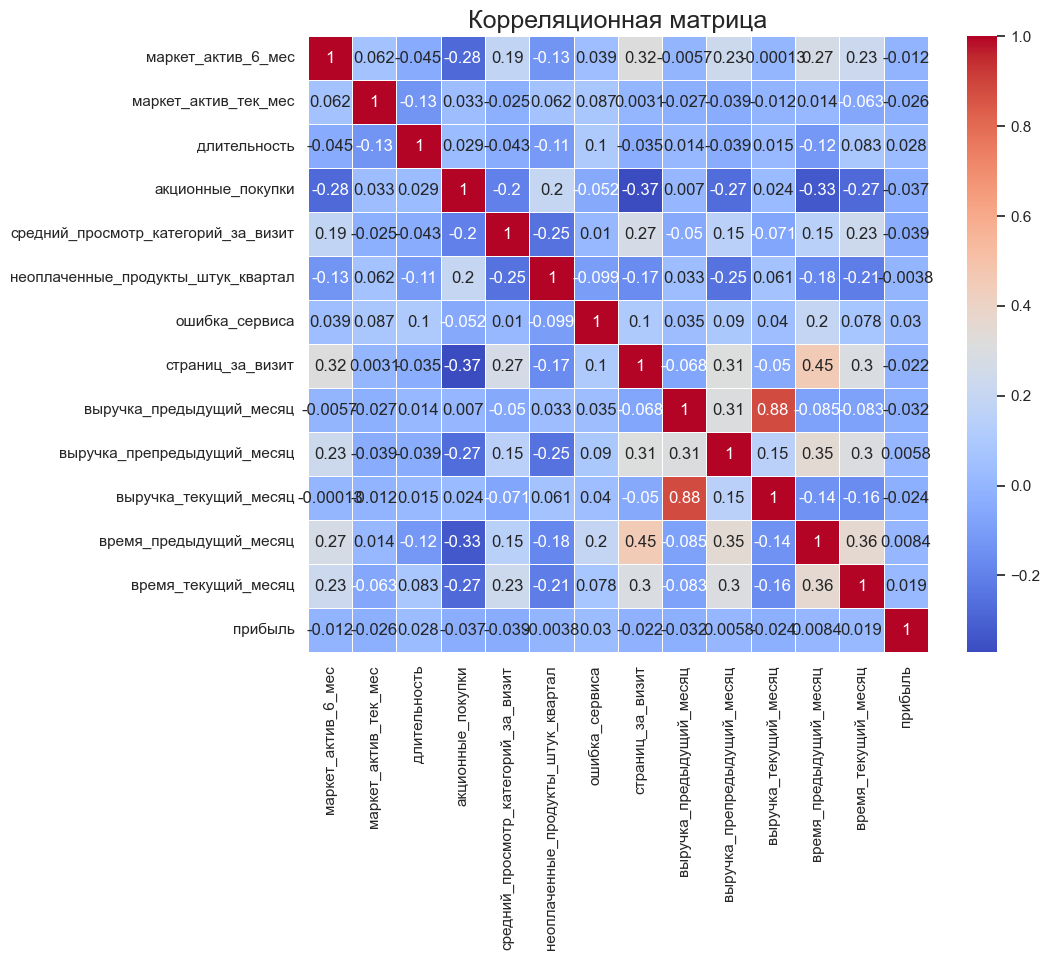

In [111]:
data_market_2_num = data_market_2.select_dtypes(include=['int64', 'float64']).drop(columns=['id'], errors='coerce')
spearman_corr = data_market_2_num.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица', fontsize=18)
plt.show()

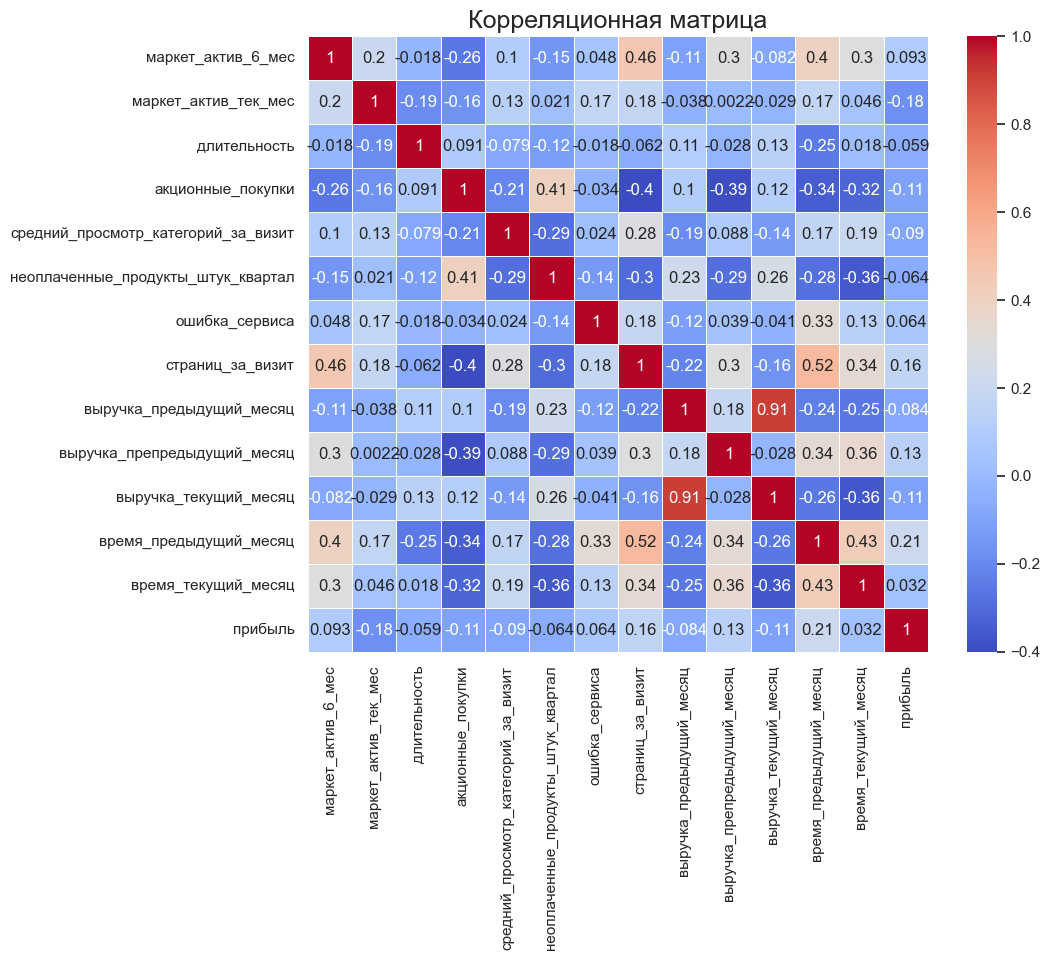

In [112]:
data_dishes_num = data_dishes.select_dtypes(include=['int64', 'float64']).drop(columns=['id'], errors='coerce')
spearman_corr = data_dishes_num.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица', fontsize=18)
plt.show()

**Вывод:** Проверив корреляционные матрицы по выборке и полному датасету, можно прийти к выводу, что паттерн поведения покупателей в целом схож - они берут на маркетплейсе корзину из товаров нескольких категорий. Также было отмечено,что высока корреляция между в ыручками прошлым и текущим месяцем, похоже, что это одни и те же покупатели. Вместе с тем, не высоко влияние акций и других маркетинговых активностей на прибыль и выручку, возможно маркетплейсу необходимо пересмотреть маркетинговую политику. 

Мы выбрали сегмент покупателей, которые регулярно покупают кухонные товары. Этот сегмент интересен, так как такие покупатели, вероятно, активно используют свою кухню и заинтересованы в новинках и улучшениях. При этом он пользуется наименьшим спросом среди покупателей.
Предложения:

+ Лояльность и программы поощрения: Внедрение программ лояльности специально для покупателей кухонных товаров. Например, предоставление скидок на последующие покупки после достижения определенного объема покупок.
+ Тематические акции и распродажи: Организация сезонных акций, связанных с кухней (например, подготовка к праздникам, летние барбекю, осенние заготовки). Создание тематических подборок и комплектов кухонных товаров с выгодными предложениями.
+ Персонализированные предложения: Анализ истории покупок каждого клиента для формирования персонализированных предложений. Например, предлагать сопутствующие товары, которые могут дополнить уже купленные предметы.
+ Отзывы и обратная связь: Активное взаимодействие с клиентами через социальные сети и отзывы на сайте. Стимулирование оставления отзывов с возможностью получения бонусов или подарков. Регулярные опросы для понимания потребностей и предпочтений клиентов.

Программы лояльности помогут удержать существующих клиентов и стимулируют их к дальнейшим покупкам.
Тематические акции создадут дополнительный интерес и привлекут внимание к ассортименту.
Персонализация сделает предложения более релевантными и увеличит вероятность совершения покупки.
Отзывы и обратная связь позволят постоянно совершенствовать предложение и улучшать сервис.

### Общий вывод

+ Проект был направлен на разработку решений для персонализации предложений постоянным клиентам с целью увеличения их покупательской активности. После подготовки данных и проведения корреляционного анализа была создана модель, прогнозирующая снижение покупательской активности. Важнейшие признаки включают 'акционные покупки' (влияет на предсказание снижения активности); 'время_предыдущий_месяц'; 'время_текущий_месяц'; 'страниц за визит' (влияют на сохранение прежнего уровня активности).

Для поиска лучшей модели мы провели следующую работу: 
+ Предварительная обработка данных: Обработали дубликаты и привели данные к корректным типам. 
+ Исследовательский анализ данных:Проанализировали распределение признаков, их взаимосвязь и корреляцию с целевым признаком. 
Моделирование: Построили и оценили несколько моделей машинного обучения, включая:
+ Дерево решений (Decision Tree)
+ Метод k-ближайших соседей (KNN)
+ Логистическая регрессия (Logistic Regression)
+ Метод опорных векторов (SVM) 
+ Использовали GridSearchCV для подбора лучших гиперпараметров для каждой модели. Оценивали модели по метрике ROC-AUC с помощью кросс-валидации и тестирования на отдельной выборке. Лучшая моделью оказалась "метод опорных векторов" (SVM). Эта модель показала качество 91,7% по ROC-AUC при кросс-валидации и около 91,4% на тестовой выборке.

+ На основе корреляционного анализа установлено, что поведение покупателей на маркетплейсе характеризуется покупкой товаров из нескольких категорий одновременно. Выручка текущего месяца тесно связана с предыдущими результатами, что указывает на постоянство аудитории. Влияние акций и маркетинговых мероприятий на прибыль незначительно, поэтому маркетплейсу стоит пересмотреть стратегию продвижения. Фокус сделан на сегменте покупателей кухонных товаров, который обладает потенциалом роста благодаря заинтересованности в новинках и улучшениях. Для стимулирования активности рекомендуется внедрить программы лояльности, проводить тематические акции, персонализировать предложения и активно взаимодействовать с клиентами через отзывы и опросы.